In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D
from utils import *
from plot_utils import *
from tqdm import tqdm
%matplotlib inline

# ER

In [2]:
p_values = np.linspace(0.1, 1, 21)
n_values = [50, 100, 150, 200]
number_of_loops = 30

results = []

for n in n_values:
    for p in p_values:
        
        H_sum, H_sum_geometric, H_sum_harmonic, m2_sum, Q_sum , gini_sum, estrada_sum, gintropy_sum = 0, 0, 0, 0, 0, 0, 0, 0

        for i in range(number_of_loops):

            G = nx.erdos_renyi_graph(n=n, p=p)
            P = stochastic_matrix_calculator(G)

            indices = get_all_indices_custom(G, P)
            H_value = indices['H']
            H_geometric = calculate_H_geometric(G)[0]

            estrada_index_value = estrada_index(G)
            gini_value = calculate_gini(G)

            H_sum += H_value
            H_sum_geometric += H_geometric
            m2_sum += indices['m2']
            Q_sum += indices['Q']
            estrada_sum += estrada_index_value
            gini_sum += gini_value
            gintropy_sum += gini_value * 2

        avg_H = H_sum / number_of_loops
        avg_H_geometric = H_sum_geometric / number_of_loops
        avg_H_harmonic = H_sum_harmonic / number_of_loops
        avg_m2 = m2_sum / number_of_loops
        avg_Q = Q_sum / number_of_loops
        avg_gini = gini_sum / number_of_loops
        avg_estrada = estrada_sum / number_of_loops
        avg_gintropy = gintropy_sum / number_of_loops


        results.append({
            "n": n,
            "p": p,
            "H": avg_H,
            "H_geometric": avg_H_geometric,
            "m2": avg_m2,
            "Q": avg_Q,
            "gini": avg_gini,
            "estrada": avg_estrada,
            "gintropy": avg_gintropy

        })

        print(f"Done: n={n}, p={p:.2f}")

        

    
    print(f'ER with {n} nodes Completed!')

ER_df_total = pd.DataFrame(results)
ER_df_total.to_csv("SavedNetworks/ER_df_total.csv")
ER_df_total

d:\Personal\University\Paper\Network - Dr.Safaei\new_h_parameter\utils.py:644: RuntimeWarning: divide by zero encountered in log
  degrees_geo_mean = np.exp(np.mean(np.log(degrees)))
d:\Personal\University\Paper\Network - Dr.Safaei\new_h_parameter\utils.py:676: RuntimeWarning: divide by zero encountered in log
  degrees_geo_mean = np.exp(np.mean(np.log(degrees)))


Done: n=50, p=0.10
Done: n=50, p=0.15
Done: n=50, p=0.19
Done: n=50, p=0.24
Done: n=50, p=0.28
Done: n=50, p=0.32
Done: n=50, p=0.37
Done: n=50, p=0.42
Done: n=50, p=0.46
Done: n=50, p=0.51
Done: n=50, p=0.55
Done: n=50, p=0.59
Done: n=50, p=0.64
Done: n=50, p=0.68
Done: n=50, p=0.73
Done: n=50, p=0.77
Done: n=50, p=0.82
Done: n=50, p=0.86
Done: n=50, p=0.91
Done: n=50, p=0.95
Done: n=50, p=1.00
ER with 50 nodes Completed!
Done: n=100, p=0.10
Done: n=100, p=0.15
Done: n=100, p=0.19
Done: n=100, p=0.24
Done: n=100, p=0.28
Done: n=100, p=0.32
Done: n=100, p=0.37
Done: n=100, p=0.42
Done: n=100, p=0.46
Done: n=100, p=0.51
Done: n=100, p=0.55
Done: n=100, p=0.59
Done: n=100, p=0.64
Done: n=100, p=0.68
Done: n=100, p=0.73
Done: n=100, p=0.77
Done: n=100, p=0.82
Done: n=100, p=0.86
Done: n=100, p=0.91
Done: n=100, p=0.95
Done: n=100, p=1.00
ER with 100 nodes Completed!
Done: n=150, p=0.10
Done: n=150, p=0.15
Done: n=150, p=0.19
Done: n=150, p=0.24
Done: n=150, p=0.28
Done: n=150, p=0.32
Done

,n,p,H,H_geometric,m2,Q,gini,estrada,gintropy
0,50,0.100,0.338700,0.337967,0.205894,2.176231e+15,0.239667,7.757811e-02,0.479333
1,50,0.145,0.095667,0.094700,0.142576,2.250056e+15,0.191667,4.542945e-02,0.383333
2,50,0.190,0.048433,0.047433,0.108234,6.981413e+00,0.165667,3.357184e-02,0.331333
3,50,0.235,0.034100,0.033100,0.085940,5.049625e+00,0.138667,2.386749e-02,0.277333
4,50,0.280,0.027700,0.026700,0.072642,4.095622e+00,0.126333,1.923529e-02,0.252667
...,...,...,...,...,...,...,...,...,...
79,200,0.820,0.001000,0.000000,0.006134,1.241282e+00,0.020000,3.264189e-04,0.040000
80,200,0.865,0.001000,0.000000,0.005811,1.194594e+00,0.017667,2.232748e-04,0.035333
81,200,0.910,0.001000,0.000000,0.005523,1.152789e+00,0.010000,1.490915e-04,0.020000
82,200,0.955,0.001000,0.000000,0.005262,1.102060e+00,0.010000,6.755587e-05,0.020000


In [3]:
ER_df_total = pd.read_csv("SavedNetworks/ER_df_total.csv")

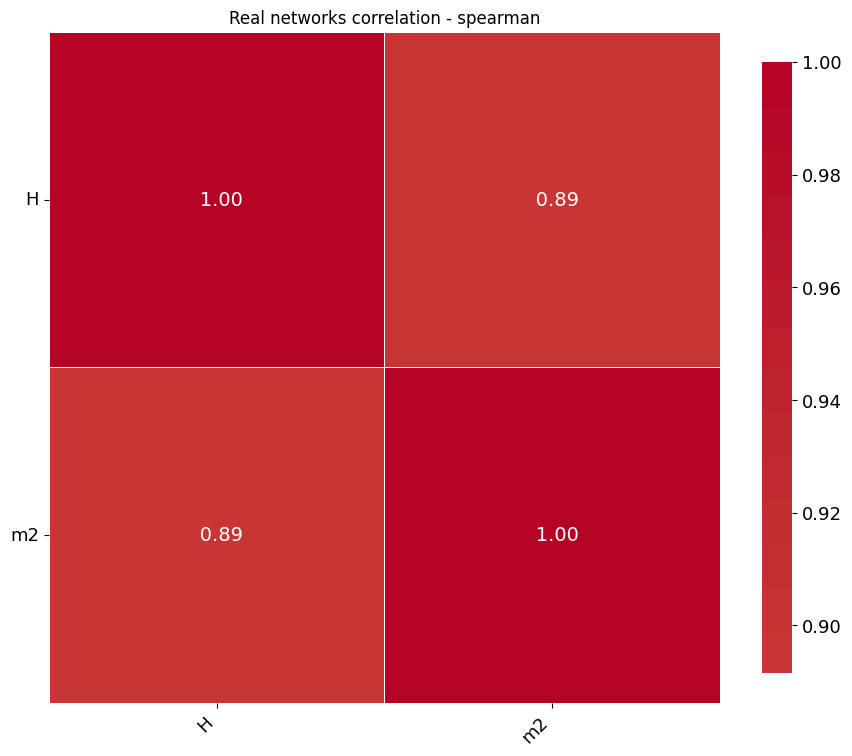

In [4]:
new_er_df = ER_df_total[['H', 'm2']]
corr_matrix = new_er_df.corr(method='spearman')
def format_corr(val):
    s = f"{val:.2f}"
    if s.startswith('-'):
        return '−\u2009' + s[1:]  
    else:
        return '\u2002' + s        

annot_labels = corr_matrix.map(format_corr)

fig, ax = plt.subplots(figsize=(9, 8))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr_matrix,
    annot=annot_labels,
    fmt='', 
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.7,
    cbar_kws={"shrink": 0.8, "aspect": 20},
    annot_kws={"fontsize": 14},
    ax=ax
)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=13, rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=13, rotation=0)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=13)

plt.tight_layout(pad=0.8)
plt.title("Real networks correlation - spearman")

plt.show()

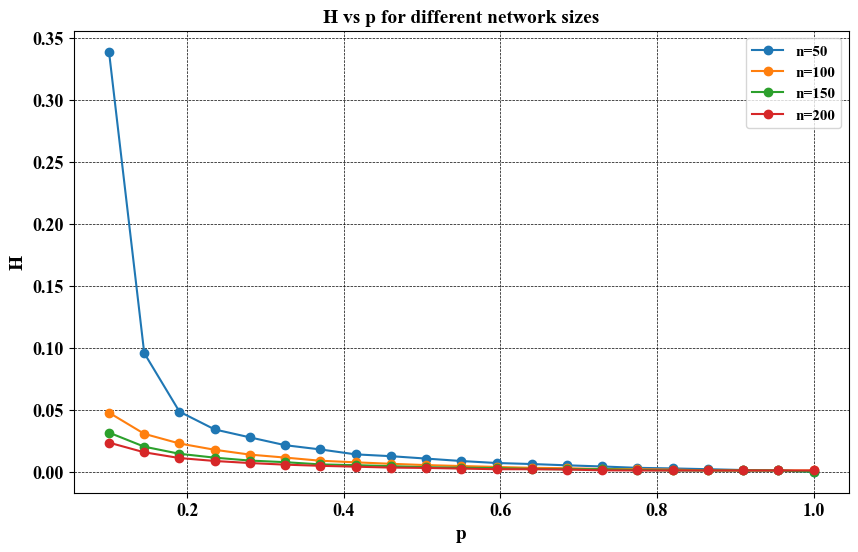

In [5]:
plt.figure(figsize=(10, 6))
font = {'family': 'times new roman', 'weight': 'bold', 'size': 11}

n_values = ER_df_total['n'].unique()

for n in n_values:
    subset = ER_df_total[ER_df_total['n'] == n]
    plt.plot(subset['p'], subset['H'], marker='o', label=f'n={n}')

plt.xlabel('p', family= 'times new roman', weight='bold', size=14)
plt.ylabel('H', family= 'times new roman', weight='bold', size=14)
plt.title('H vs p for different network sizes', family= 'times new roman', weight='bold', size=14)
plt.legend(loc='upper right', prop=font)
plt.xticks(family= 'times new roman', weight='bold', size=13)
plt.yticks(family= 'times new roman', weight='bold', size=13)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.show()

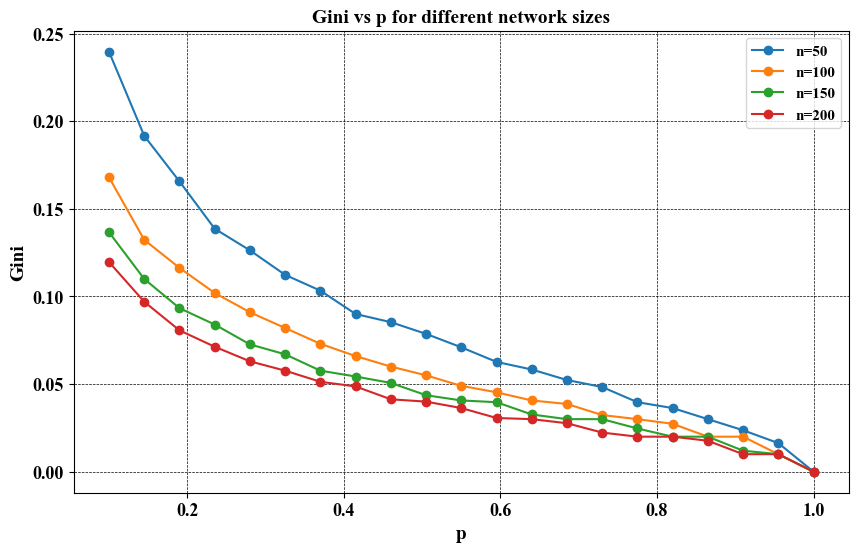

In [6]:
plt.figure(figsize=(10, 6))
font = {'family': 'times new roman', 'weight': 'bold', 'size': 11}

n_values = ER_df_total['n'].unique()

for n in n_values:
    subset = ER_df_total[ER_df_total['n'] == n]
    plt.plot(subset['p'], subset['gini'], marker='o', label=f'n={n}')

plt.xlabel('p', family= 'times new roman', weight='bold', size=14)
plt.ylabel('Gini', family= 'times new roman', weight='bold', size=14)
plt.title('Gini vs p for different network sizes', family= 'times new roman', weight='bold', size=14)
plt.legend(loc='upper right', prop=font)
plt.xticks(family= 'times new roman', weight='bold', size=13)
plt.yticks(family= 'times new roman', weight='bold', size=13)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.show()

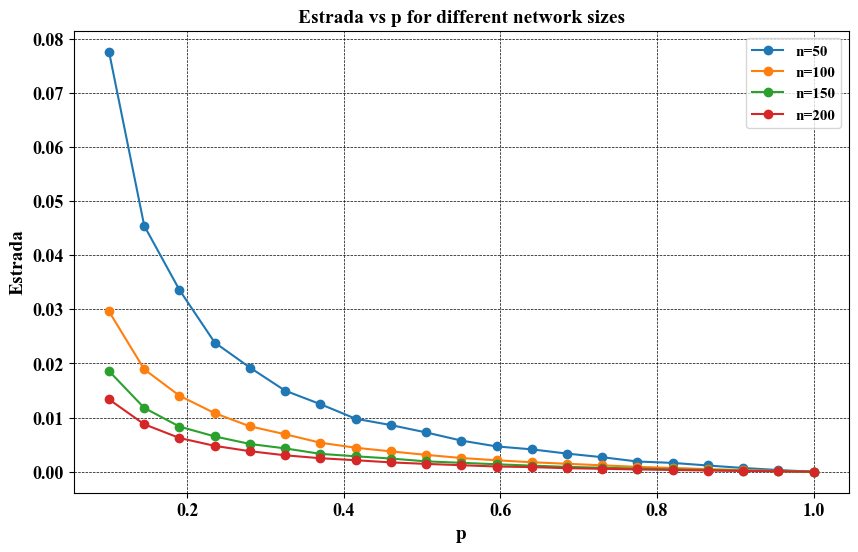

In [7]:
plt.figure(figsize=(10, 6))
font = {'family': 'times new roman', 'weight': 'bold', 'size': 11}

n_values = ER_df_total['n'].unique()

for n in n_values:
    subset = ER_df_total[ER_df_total['n'] == n]
    plt.plot(subset['p'], subset['estrada'], marker='o', label=f'n={n}')

plt.xlabel('p', family= 'times new roman', weight='bold', size=14)
plt.ylabel('Estrada', family= 'times new roman', weight='bold', size=14)
plt.title('Estrada vs p for different network sizes', family= 'times new roman', weight='bold', size=14)
plt.legend(loc='upper right', prop=font)
plt.xticks(family= 'times new roman', weight='bold', size=13)
plt.yticks(family= 'times new roman', weight='bold', size=13)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.show()

In [8]:
ER_results__total = dict()
avg_H_differences=list()
n = 100
p_values = np.round(np.arange(0.15, 0.95, 0.02), 2)

for p in tqdm(p_values):
    ER_results__total[p]=dict()
    ER_H_values = list()
    ER_H_differences = list()
    H_sum, m2_sum, Q_sum, R_sum, sum_R_v_sum = 0, 0, 0, 0, 0
    
    number_of_loops = 30
    
    for i in range(number_of_loops):
        G = nx.erdos_renyi_graph(n=n, p=p)
        P = stochastic_matrix_calculator(G)
        num_of_nodes = G.number_of_nodes()
        
        H = calculate_H(G)[0]
        ER_H_values.append(H)
        H_sum += H
        #m2_sum += specteral_moment_calculator(P, 2)
        m2_sum += est_moment(G, 10000, 2)[1]
        _, _, Q = synchronizability_calculator(G, for_real_networks=False)
        Q_sum += Q / (num_of_nodes - 1)
        #R_sum += normalized_graph_resistance(G)
        sum_R_v_sum += total_vertex_resistance(G)
    
    ER_results__total[p]['H'] = H_sum / number_of_loops
    ER_results__total[p]['m2'] = m2_sum / number_of_loops
    ER_results__total[p]['Q'] = Q_sum / number_of_loops
    #ER_results[p]['R'] = R_sum / number_of_loops
    ER_results__total[p]['sum_R_v'] = sum_R_v_sum / number_of_loops
    
    #print(f'ER with p={p} Completed!')

ER_df__total = pd.DataFrame(ER_results__total).T
ER_df__total.reset_index(drop=False, inplace=True)
ER_df__total.rename(columns={'index':"p"}, inplace=True)
ER_df__total.to_csv("SavedNetworks/ER_df__total.csv")
ER_df__total

100%|██████████| 40/40 [01:50<00:00,  2.76s/it]


,p,H,m2,Q,sum_R_v
0,0.15,0.028567,0.066233,0.049518,0.060787
1,0.17,0.027000,0.059870,0.044883,0.051011
2,0.19,0.022633,0.052427,0.039131,0.042803
3,0.21,0.020200,0.048380,0.036555,0.037915
4,0.23,0.018033,0.044280,0.032925,0.033623
5,0.25,0.015933,0.040113,0.031749,0.029868
6,0.27,0.014233,0.037570,0.028503,0.027177
7,0.29,0.013033,0.035200,0.027484,0.024891
8,0.31,0.011567,0.032610,0.025623,0.022452
9,0.33,0.010533,0.030480,0.024310,0.020579


In [9]:
ER_df__total = pd.read_csv("SavedNetworks/ER_df__total.csv")

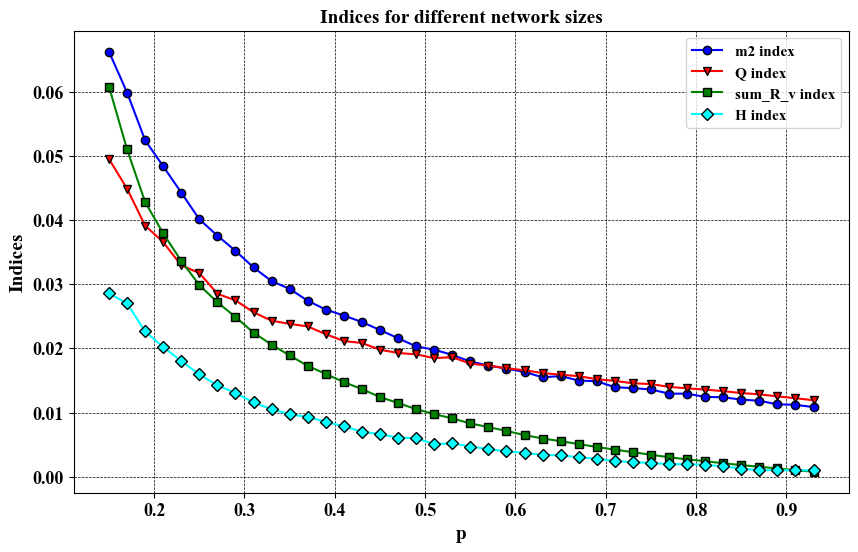

In [10]:
plt.figure(figsize=(10, 6))
font = {'family': 'times new roman', 'weight': 'bold', 'size': 11}


x_values = ER_df__total['p']
y_values = ['m2', 'Q',  'sum_R_v', 'H']
colors = ['b','r','g','cyan','orange']
markers = ['o', 'v', 's', 'D', '^']


for i,y in enumerate(y_values):
    plt.plot(x_values, ER_df__total[y], marker=markers[i], color=colors[i],label=y+' index', markeredgecolor='black')

plt.xlabel('p', family= 'times new roman', weight='bold', size=14)
plt.ylabel('Indices', family= 'times new roman', weight='bold', size=14)
plt.title('Indices for different network sizes', family= 'times new roman', weight='bold', size=14)
plt.legend(loc='upper right', prop=font)
plt.xticks(family= 'times new roman', weight='bold', size=13)
plt.yticks(family= 'times new roman', weight='bold', size=13)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.show()

# BA

In [11]:
m_values = np.arange(3, 100, 2)
n_values = [50, 100, 150, 200]
number_of_loops = 30

results = []

for n in n_values:
    for m in m_values:
        if m >= n:
            break 

        H_sum, H_sum_geometric, H_sum_harmonic, gintropy_sum, m2_sum, Q_sum , gini_sum, estrada_sum = 0, 0, 0, 0, 0, 0, 0, 0

        for i in range(number_of_loops):

            G = nx.barabasi_albert_graph(
                n=n,
                m=m,
            )

            P = stochastic_matrix_calculator(G)
            num_of_nodes = G.number_of_nodes()
            estrada_index_value = estrada_index(G)
            H_value = calculate_H(G)[0] 
            H_geometric = calculate_H_geometric(G)[0]

            gini_value = calculate_gini(G)
            gintropy = gini_value * 2
            m2_ = specteral_moment_calculator(P, 2)
            _, _, Q_ = synchronizability_calculator(G, for_real_networks=False)

            gini_sum += gini_value
            H_sum += H_value
            H_sum_geometric += H_geometric
            gintropy_sum += gintropy
            m2_sum += m2_
            Q_sum += Q_
            estrada_sum += estrada_index_value
            
            

        avg_H = H_sum / number_of_loops
        avg_H_geometric = H_sum_geometric / number_of_loops
        avg_gintropy = gintropy_sum / number_of_loops
        avg_m2 = m2_sum / number_of_loops
        avg_Q = Q_sum / number_of_loops
        gini = gini_sum / number_of_loops
        estrada = estrada_sum / number_of_loops


        results.append({
            "n": n,
            "m": m,
            "H": avg_H,
            "H_geometric": avg_H_geometric,
            "gintropy": avg_gintropy,
            "m2": avg_m2,
            "Q": avg_Q,
            "gini": gini,
            "estrada": estrada

        })

        print(f"Done: n={n}, m={m:.2f}")

        

    
    print(f'BA with {n} nodes Completed!')


BA_df_total = pd.DataFrame(results)
BA_df_total.to_csv("SavedNetworks/BA_df_total.csv")
BA_df_total

Done: n=50, m=3.00
Done: n=50, m=5.00
Done: n=50, m=7.00
Done: n=50, m=9.00
Done: n=50, m=11.00
Done: n=50, m=13.00
Done: n=50, m=15.00
Done: n=50, m=17.00
Done: n=50, m=19.00
Done: n=50, m=21.00
Done: n=50, m=23.00
Done: n=50, m=25.00
Done: n=50, m=27.00
Done: n=50, m=29.00
Done: n=50, m=31.00
Done: n=50, m=33.00
Done: n=50, m=35.00
Done: n=50, m=37.00
Done: n=50, m=39.00
Done: n=50, m=41.00
Done: n=50, m=43.00
Done: n=50, m=45.00
Done: n=50, m=47.00
Done: n=50, m=49.00
BA with 50 nodes Completed!
Done: n=100, m=3.00
Done: n=100, m=5.00
Done: n=100, m=7.00
Done: n=100, m=9.00
Done: n=100, m=11.00
Done: n=100, m=13.00
Done: n=100, m=15.00
Done: n=100, m=17.00
Done: n=100, m=19.00
Done: n=100, m=21.00
Done: n=100, m=23.00
Done: n=100, m=25.00
Done: n=100, m=27.00
Done: n=100, m=29.00
Done: n=100, m=31.00
Done: n=100, m=33.00
Done: n=100, m=35.00
Done: n=100, m=37.00
Done: n=100, m=39.00
Done: n=100, m=41.00
Done: n=100, m=43.00
Done: n=100, m=45.00
Done: n=100, m=47.00
Done: n=100, m=49

,n,m,H,H_geometric,gintropy,m2,Q,gini,estrada
0,50,3,0.151933,0.150933,0.634667,0.161876,16.709917,0.317333,0.146450
1,50,5,0.117033,0.116033,0.555333,0.105354,12.610108,0.277667,0.103835
2,50,7,0.094867,0.093867,0.496667,0.080594,10.812583,0.248333,0.078053
3,50,9,0.083733,0.082733,0.462000,0.065825,10.122379,0.231000,0.069029
4,50,11,0.073500,0.072500,0.426667,0.056958,9.093978,0.213333,0.058823
...,...,...,...,...,...,...,...,...,...
166,200,91,0.084133,0.083133,0.472667,0.009362,4.629173,0.236333,0.068429
167,200,93,0.086667,0.085667,0.480000,0.009290,4.810268,0.240000,0.070968
168,200,95,0.089933,0.088933,0.480000,0.009218,4.849882,0.240000,0.074161
169,200,97,0.092433,0.091433,0.492000,0.009157,4.766171,0.246000,0.076962


In [12]:
BA_df_total = pd.read_csv("SavedNetworks/BA_df_total.csv")

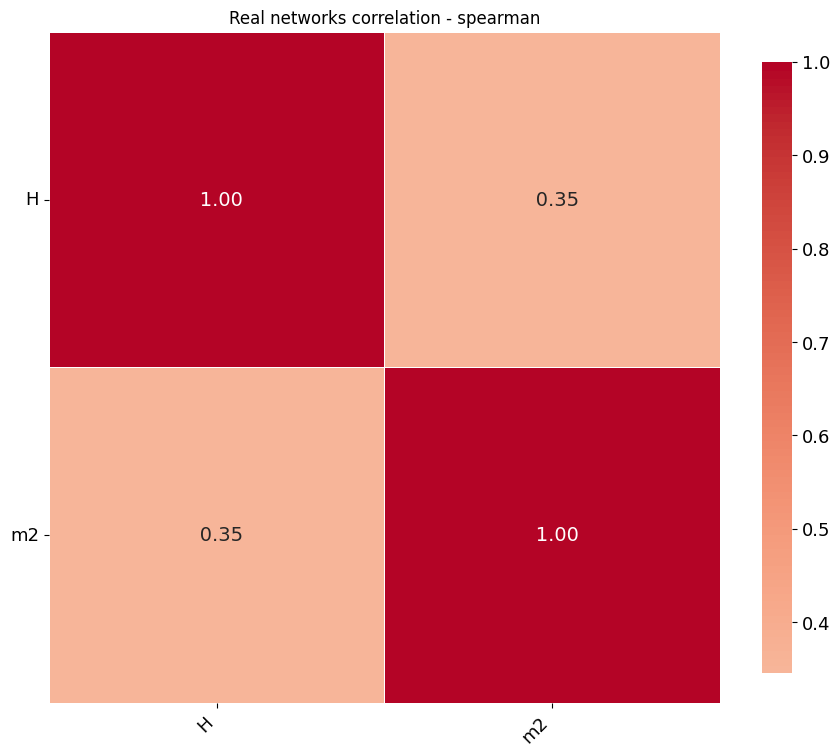

In [13]:
new_er_df = BA_df_total[['H', 'm2']]
corr_matrix = new_er_df.corr(method='spearman')
def format_corr(val):
    s = f"{val:.2f}"
    if s.startswith('-'):
        return '−\u2009' + s[1:]  
    else:
        return '\u2002' + s        

annot_labels = corr_matrix.map(format_corr)

fig, ax = plt.subplots(figsize=(9, 8))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr_matrix,
    annot=annot_labels,
    fmt='', 
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.7,
    cbar_kws={"shrink": 0.8, "aspect": 20},
    annot_kws={"fontsize": 14},
    ax=ax
)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=13, rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=13, rotation=0)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=13)

plt.tight_layout(pad=0.8)
plt.title("Real networks correlation - spearman")

plt.show()

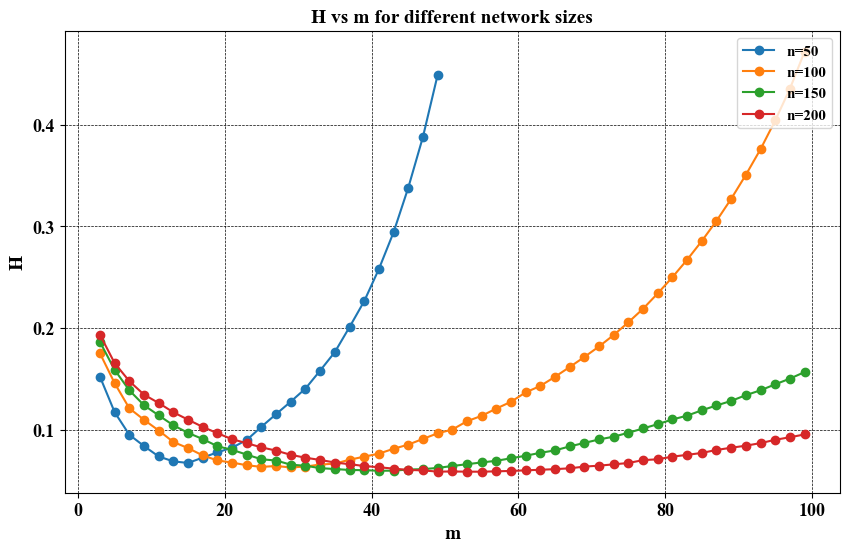

In [14]:
plt.figure(figsize=(10, 6))
font = {'family': 'times new roman', 'weight': 'bold', 'size': 11}

n_values = BA_df_total['n'].unique()

for n in n_values:
    subset = BA_df_total[BA_df_total['n'] == n]
    plt.plot(subset['m'], subset['H'], marker='o', label=f'n={n}')

plt.xlabel('m', family= 'times new roman', weight='bold', size=14)
plt.ylabel('H', family= 'times new roman', weight='bold', size=14)
plt.title('H vs m for different network sizes', family= 'times new roman', weight='bold', size=14)
plt.legend(loc='upper right', prop=font)
plt.xticks(family= 'times new roman', weight='bold', size=13)
plt.yticks(family= 'times new roman', weight='bold', size=13)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.show()

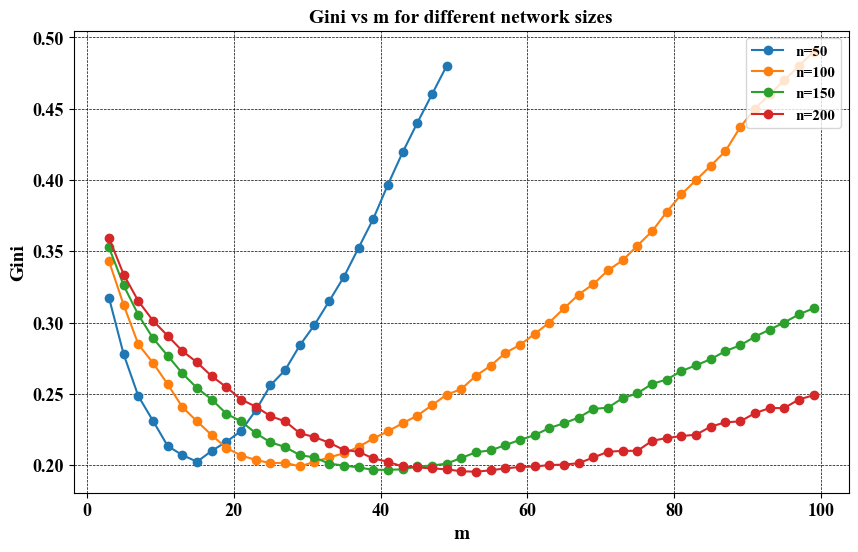

In [15]:
plt.figure(figsize=(10, 6))
font = {'family': 'times new roman', 'weight': 'bold', 'size': 11}

n_values = BA_df_total['n'].unique()

for n in n_values:
    subset = BA_df_total[BA_df_total['n'] == n]
    plt.plot(subset['m'], subset['gini'], marker='o', label=f'n={n}')

plt.xlabel('m', family= 'times new roman', weight='bold', size=14)
plt.ylabel('Gini', family= 'times new roman', weight='bold', size=14)
plt.title('Gini vs m for different network sizes', family= 'times new roman', weight='bold', size=14)
plt.legend(loc='upper right', prop=font)
plt.xticks(family= 'times new roman', weight='bold', size=13)
plt.yticks(family= 'times new roman', weight='bold', size=13)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.show()

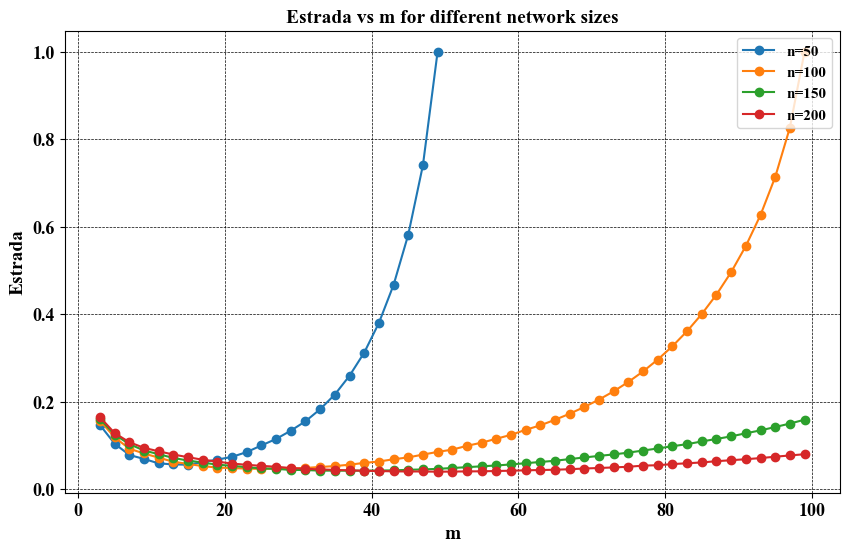

In [16]:
plt.figure(figsize=(10, 6))
font = {'family': 'times new roman', 'weight': 'bold', 'size': 11}

n_values = BA_df_total['n'].unique()

for n in n_values:
    subset = BA_df_total[BA_df_total['n'] == n]
    plt.plot(subset['m'], subset['estrada'], marker='o', label=f'n={n}')

plt.xlabel('m', family= 'times new roman', weight='bold', size=14)
plt.ylabel('Estrada', family= 'times new roman', weight='bold', size=14)
plt.title('Estrada vs m for different network sizes', family= 'times new roman', weight='bold', size=14)
plt.legend(loc='upper right', prop=font)
plt.xticks(family= 'times new roman', weight='bold', size=13)
plt.yticks(family= 'times new roman', weight='bold', size=13)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.show()

In [17]:
BA_results = dict()
n = 100
m_values = np.arange(2, 100, 2)
use_original_formula_H = True

for m in tqdm(m_values):
    #print(f'-----ER with {n} nodes------\n')
    BA_results[m]=dict()
    H_sum, m2_sum, Q_sum, R_sum, sum_R_v_sum = 0, 0, 0, 0, 0
    
    number_of_loops = 30
    
    for i in range(number_of_loops):
    
        G = nx.barabasi_albert_graph(n=n, m=m)
        P = stochastic_matrix_calculator(G)
        num_of_nodes = G.number_of_nodes()
        
        H_sum += calculate_H(G)[0]
        m2_sum += specteral_moment_calculator(P, 2)
        _, _, Q = synchronizability_calculator(G, for_real_networks=False)
        Q_sum += Q / (num_of_nodes - 1)
        sum_R_v_sum += total_vertex_resistance(G)
        
    BA_results[m]['H'] = H_sum / number_of_loops
    BA_results[m]['m2'] = m2_sum / number_of_loops
    BA_results[m]['Q'] = Q_sum / number_of_loops
    BA_results[m]['sum_R_v'] = sum_R_v_sum / number_of_loops
    

BA_df__total = pd.DataFrame(BA_results).T
BA_df__total.reset_index(drop=False, inplace=True)
BA_df__total.rename(columns={'index':"m"}, inplace=True)
BA_df__total.to_csv("SavedNetworks/BA_df__total.csv")
BA_df__total

100%|██████████| 49/49 [01:27<00:00,  1.79s/it]


,m,H,m2,Q,sum_R_v
0,2,0.204167,0.216734,0.450588,0.293017
1,4,0.157333,0.121299,0.185213,0.115614
2,6,0.131400,0.085127,0.131011,0.068292
3,8,0.114133,0.066145,0.115514,0.047970
4,10,0.102267,0.054329,0.098294,0.036421
5,12,0.092500,0.046508,0.103025,0.029868
6,14,0.082967,0.040937,0.088150,0.025625
7,16,0.078667,0.036699,0.145466,0.022481
8,18,0.071600,0.033406,0.077389,0.019919
9,20,0.067300,0.030795,0.085480,0.017904


In [18]:
BA_df__total = pd.read_csv("SavedNetworks/BA_df__total.csv")

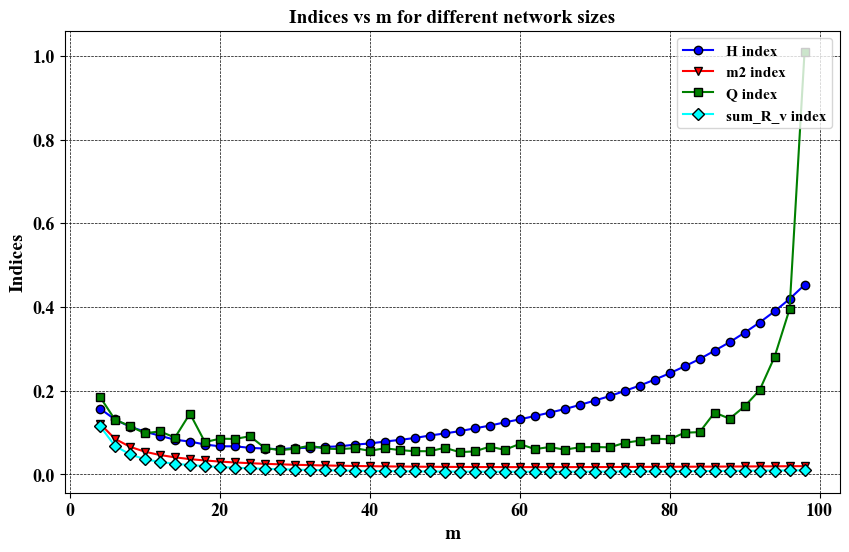

In [19]:
plt.figure(figsize=(10, 6))
font = {'family': 'times new roman', 'weight': 'bold', 'size': 11}


x_values = BA_df__total['m'][1:]
y_values = ['H', 'm2',  'Q','sum_R_v']
colors = ['b','r','g','cyan','orange']
markers = ['o', 'v', 's', 'D', '^']

# Plot
for i,y in enumerate(y_values):
    plt.plot(x_values, BA_df__total[y][1:], marker=markers[i], color=colors[i],label=y+' index', markeredgecolor='black')

plt.xlabel('m', family= 'times new roman', weight='bold', size=14)
plt.ylabel('Indices', family= 'times new roman', weight='bold', size=14)
plt.title('Indices vs m for different network sizes', family= 'times new roman', weight='bold', size=14)
plt.legend(loc='upper right', prop=font)
plt.xticks(family= 'times new roman', weight='bold', size=13)
plt.yticks(family= 'times new roman', weight='bold', size=13)
plt.grid(color='black', linestyle='--', linewidth=0.5)
# plt.savefig("plots/multi_baranasi.png" , dpi=1000, bbox_inches='tight')
plt.show()

# SW

In [21]:
p_values = np.round(np.arange(0.1, 0.95, 0.02), 2)
n_values = [50, 100, 150, 200]
number_of_loops = 30

results = []
k = 4

for n in n_values:
    for p in p_values:

        H_sum, H_sum_geometric, H_sum_harmonic,  m2_sum, Q_sum , gini_sum, estrada_sum, gintropy_sum = 0, 0, 0, 0, 0, 0, 0, 0

        for i in range(number_of_loops):

            G = nx.watts_strogatz_graph(n=n, p=p, k=k)

            P = stochastic_matrix_calculator(G)
            num_of_nodes = G.number_of_nodes()
            # Estrada_, _ = get_Estrada_indices(G, P)
            estrada_index_value = estrada_index(G)
            H_value = calculate_H(G)[0]
            H_geometric = calculate_H_geometric(G)[0]
            gini_value = calculate_gini(G)
            gintropy = gini_value * 2
            m2_ = est_moment(G, 10000, 2)[1]
            _, _, Q_ = synchronizability_calculator(G, for_real_networks=False)

            gini_sum += gini_value
            H_sum += H_value
            H_sum_geometric += H_geometric
            m2_sum += m2_
            Q_sum += Q_
            estrada_sum += estrada_index_value
            gintropy_sum += gintropy
            

        avg_H = H_sum / number_of_loops
        avg_H_geometric = H_sum_geometric / number_of_loops
        avg_m2 = m2_sum / number_of_loops
        avg_Q = Q_sum / number_of_loops
        gini = gini_sum / number_of_loops
        estrada = estrada_sum / number_of_loops
        avg_gintropy = gintropy_sum / number_of_loops

        results.append({
            "n": n,
            "p": p,
            "H": avg_H,
            "H_geometric": avg_H_geometric,
            "gintropy": avg_gintropy,
            "m2": avg_m2,
            "Q": avg_Q,
            "gini": gini,
            "estrada": estrada

        })

        print(f"Done: n={n}, p={p:.2f}")

        

    
    print(f'SW with {n} nodes Completed!')


SW_df_total = pd.DataFrame(results)
SW_df_total.to_csv("SavedNetworks/SW_df_total.csv")
SW_df_total

Done: n=50, p=0.10
Done: n=50, p=0.12
Done: n=50, p=0.14
Done: n=50, p=0.16
Done: n=50, p=0.18
Done: n=50, p=0.20
Done: n=50, p=0.22
Done: n=50, p=0.24
Done: n=50, p=0.26
Done: n=50, p=0.28
Done: n=50, p=0.30
Done: n=50, p=0.32
Done: n=50, p=0.34
Done: n=50, p=0.36
Done: n=50, p=0.38
Done: n=50, p=0.40
Done: n=50, p=0.42
Done: n=50, p=0.44
Done: n=50, p=0.46
Done: n=50, p=0.48
Done: n=50, p=0.50
Done: n=50, p=0.52
Done: n=50, p=0.54
Done: n=50, p=0.56
Done: n=50, p=0.58
Done: n=50, p=0.60
Done: n=50, p=0.62
Done: n=50, p=0.64
Done: n=50, p=0.66
Done: n=50, p=0.68
Done: n=50, p=0.70
Done: n=50, p=0.72
Done: n=50, p=0.74
Done: n=50, p=0.76
Done: n=50, p=0.78
Done: n=50, p=0.80
Done: n=50, p=0.82
Done: n=50, p=0.84
Done: n=50, p=0.86
Done: n=50, p=0.88
Done: n=50, p=0.90
Done: n=50, p=0.92
Done: n=50, p=0.94
SW with 50 nodes Completed!
Done: n=100, p=0.10
Done: n=100, p=0.12
Done: n=100, p=0.14
Done: n=100, p=0.16
Done: n=100, p=0.18
Done: n=100, p=0.20
Done: n=100, p=0.22
Done: n=100, p=

,n,p,H,H_geometric,gintropy,m2,Q,gini,estrada
0,50,0.10,0.012833,0.011833,0.138667,0.249570,42.668287,0.069333,0.008860
1,50,0.12,0.015267,0.014267,0.162667,0.249077,39.752442,0.081333,0.010593
2,50,0.14,0.017167,0.016167,0.176667,0.249427,33.201971,0.088333,0.011991
3,50,0.16,0.018000,0.017000,0.180000,0.250817,32.044741,0.090000,0.012351
4,50,0.18,0.022200,0.021200,0.208000,0.249623,29.214999,0.104000,0.015867
...,...,...,...,...,...,...,...,...,...
167,200,0.86,0.059167,0.058167,0.379333,0.245717,19.219463,0.189667,0.039228
168,200,0.88,0.059700,0.058700,0.378667,0.245287,18.823321,0.189333,0.039087
169,200,0.90,0.060533,0.059533,0.382000,0.244873,18.926943,0.191000,0.039991
170,200,0.92,0.059867,0.058867,0.380000,0.246260,19.309223,0.190000,0.039118


In [22]:
SW_df_total = pd.read_csv("SavedNetworks/SW_df_total.csv")

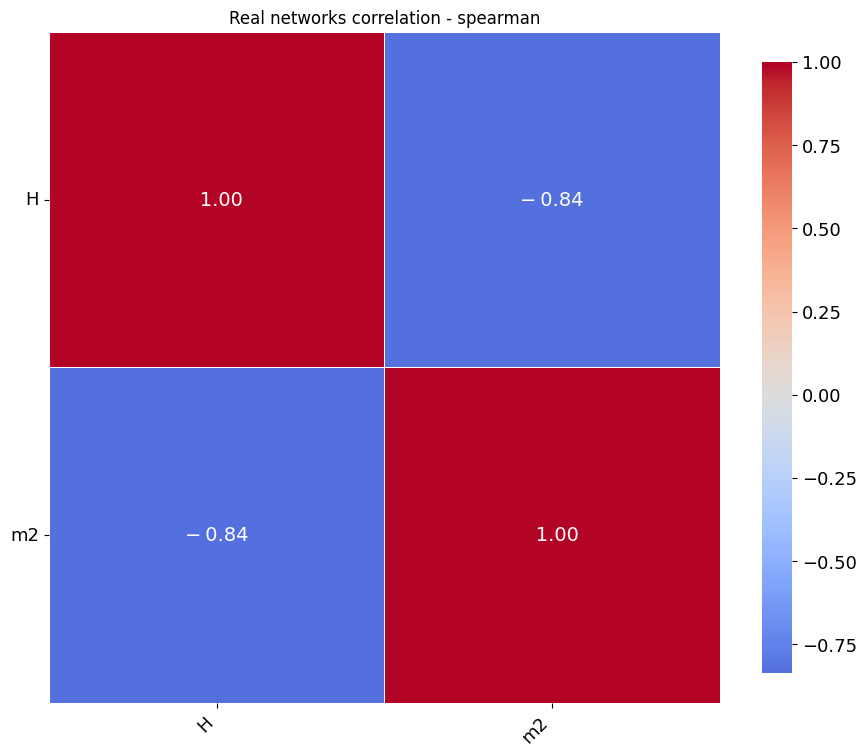

In [23]:
new_er_df = SW_df_total[['H', 'm2']]
corr_matrix = new_er_df.corr(method='spearman')
def format_corr(val):
    s = f"{val:.2f}"
    if s.startswith('-'):
        return '−\u2009' + s[1:]  
    else:
        return '\u2002' + s        

annot_labels = corr_matrix.map(format_corr)

fig, ax = plt.subplots(figsize=(9, 8))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr_matrix,
    annot=annot_labels,
    fmt='', 
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.7,
    cbar_kws={"shrink": 0.8, "aspect": 20},
    annot_kws={"fontsize": 14},
    ax=ax
)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=13, rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=13, rotation=0)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=13)

plt.tight_layout(pad=0.8)
plt.title("Real networks correlation - spearman")

# plt.savefig('plots/real_graphs_heatmap.png', facecolor='white', dpi=600, bbox_inches='tight')
plt.show()

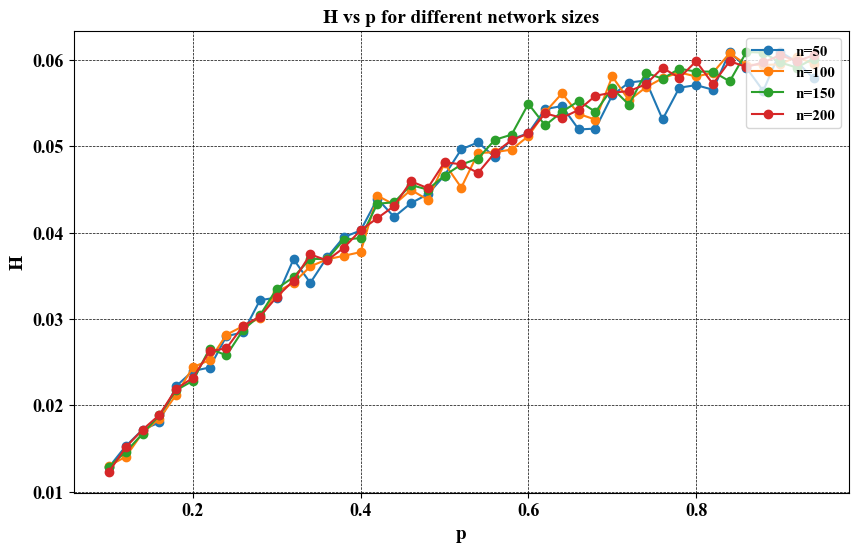

In [24]:
plt.figure(figsize=(10, 6))
font = {'family': 'times new roman', 'weight': 'bold', 'size': 11}

n_values = SW_df_total['n'].unique()

for n in n_values:
    subset = SW_df_total[SW_df_total['n'] == n]
    plt.plot(subset['p'], subset['H'], marker='o', label=f'n={n}')

plt.xlabel('p', family= 'times new roman', weight='bold', size=14)
plt.ylabel('H', family= 'times new roman', weight='bold', size=14)
plt.title('H vs p for different network sizes', family= 'times new roman', weight='bold', size=14)
plt.legend(loc='upper right', prop=font)
plt.xticks(family= 'times new roman', weight='bold', size=13)
plt.yticks(family= 'times new roman', weight='bold', size=13)
plt.grid(color='black', linestyle='--', linewidth=0.5)
# plt.savefig("plots/h_sw.png" , dpi=1000, bbox_inches='tight')
plt.show()

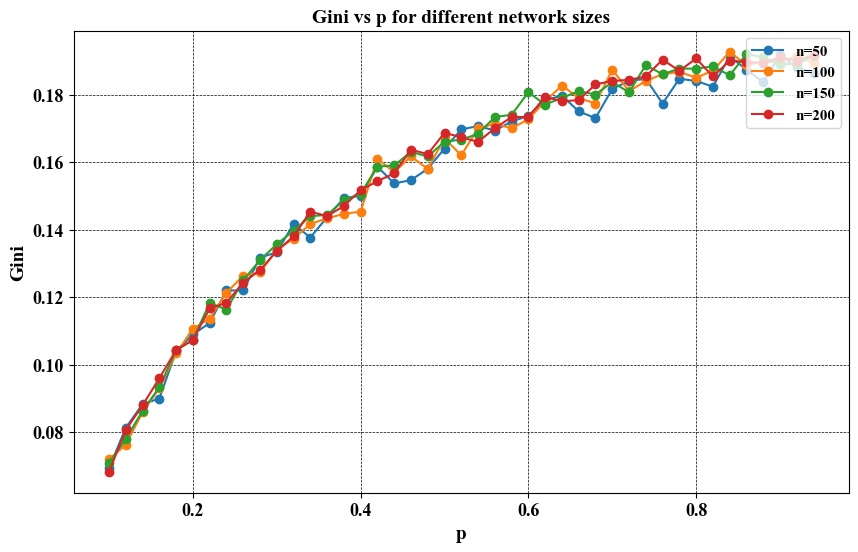

In [25]:
plt.figure(figsize=(10, 6))
font = {'family': 'times new roman', 'weight': 'bold', 'size': 11}

n_values = SW_df_total['n'].unique()

for n in n_values:
    subset = SW_df_total[SW_df_total['n'] == n]
    plt.plot(subset['p'], subset['gini'], marker='o', label=f'n={n}')

plt.xlabel('p', family= 'times new roman', weight='bold', size=14)
plt.ylabel('Gini', family= 'times new roman', weight='bold', size=14)
plt.title('Gini vs p for different network sizes', family= 'times new roman', weight='bold', size=14)
plt.legend(loc='upper right', prop=font)
plt.xticks(family= 'times new roman', weight='bold', size=13)
plt.yticks(family= 'times new roman', weight='bold', size=13)
plt.grid(color='black', linestyle='--', linewidth=0.5)
# plt.savefig("plots/gini_sw.png" , dpi=1000, bbox_inches='tight')
plt.show()

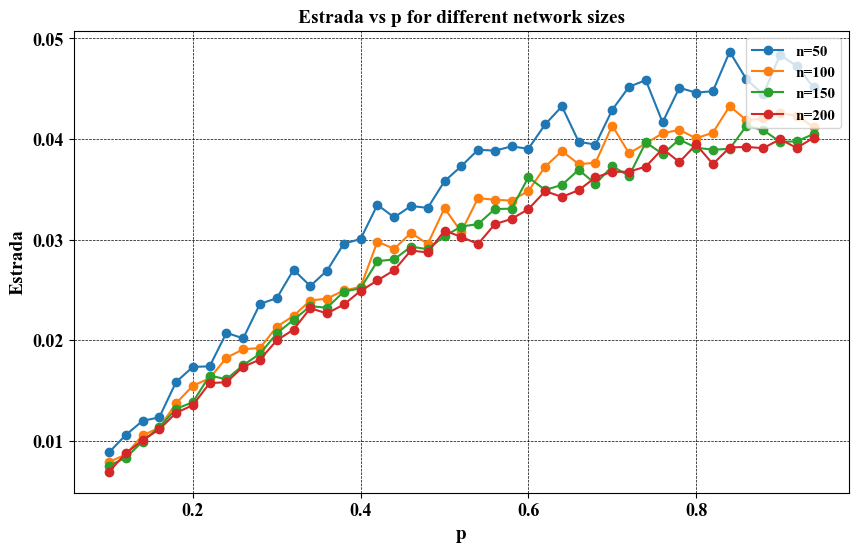

In [26]:
plt.figure(figsize=(10, 6))
font = {'family': 'times new roman', 'weight': 'bold', 'size': 11}

n_values = SW_df_total['n'].unique()

for n in n_values:
    subset = SW_df_total[SW_df_total['n'] == n]
    plt.plot(subset['p'], subset['estrada'], marker='o', label=f'n={n}')

plt.xlabel('p', family= 'times new roman', weight='bold', size=14)
plt.ylabel('Estrada', family= 'times new roman', weight='bold', size=14)
plt.title('Estrada vs p for different network sizes', family= 'times new roman', weight='bold', size=14)
plt.legend(loc='upper right', prop=font)
plt.xticks(family= 'times new roman', weight='bold', size=13)
plt.yticks(family= 'times new roman', weight='bold', size=13)
plt.grid(color='black', linestyle='--', linewidth=0.5)
# plt.savefig("plots/estrada_sw.png" , dpi=1000, bbox_inches='tight')
plt.show()

In [27]:
SW_results = dict()
n = 100
p_values = np.round(np.arange(0.1, 0.95, 0.02), 2)
k = 4

for p in tqdm(p_values):
    SW_results[p]=dict()
    SW_H_values = list()
    SW_H_differences = list()
    H_sum, m2_sum, Q_sum, R_sum, sum_R_v_sum = 0, 0, 0, 0, 0
    
    number_of_loops = 30
    
    for i in range(number_of_loops):
        G = nx.watts_strogatz_graph(n=n, p=p, k=k)
        num_of_nodes = G.number_of_nodes()
        
        H_sum += calculate_H(G)[0]

        SW_H_values.append(H)
        m2_sum += est_moment(G, 10000, 2)[1]
        _, _, Q = synchronizability_calculator(G, for_real_networks=False)
        Q_sum += Q / (num_of_nodes - 1)
        #R_sum += normalized_graph_resistance(G)
        sum_R_v_sum += total_vertex_resistance(G)
    
    SW_results[p]['H'] = H_sum / number_of_loops
    SW_results[p]['m2'] = m2_sum / number_of_loops
    SW_results[p]['Q'] = Q_sum / number_of_loops
    #ER_results[p]['R'] = R_sum / number_of_loops
    SW_results[p]['sum_R_v'] = sum_R_v_sum / number_of_loops
    
    #print(f'ER with p={p} Completed!')

SW_df__total = pd.DataFrame(SW_results).T
SW_df__total.reset_index(drop=False, inplace=True)
SW_df__total.rename(columns={'index':"p"}, inplace=True)
SW_df__total.to_csv("SavedNetworks/SW_df__total.csv")
SW_df__total

100%|██████████| 43/43 [00:47<00:00,  1.11s/it]


,p,H,m2,Q,sum_R_v
0,0.10,0.013567,0.249507,0.669954,0.966214
1,0.12,0.014733,0.250673,0.609213,0.926119
2,0.14,0.017100,0.249187,0.509276,0.868649
3,0.16,0.018767,0.250080,0.462136,0.829438
4,0.18,0.022033,0.248233,0.381228,0.784745
5,0.20,0.023033,0.249157,0.380174,0.775774
6,0.22,0.025333,0.248587,0.343853,0.741398
7,0.24,0.027500,0.249567,0.293114,0.715906
8,0.26,0.028633,0.248290,0.283965,0.706280
9,0.28,0.030667,0.249367,0.292680,0.697964


In [28]:
SW_df__total = pd.read_csv("SavedNetworks/SW_df__total.csv")

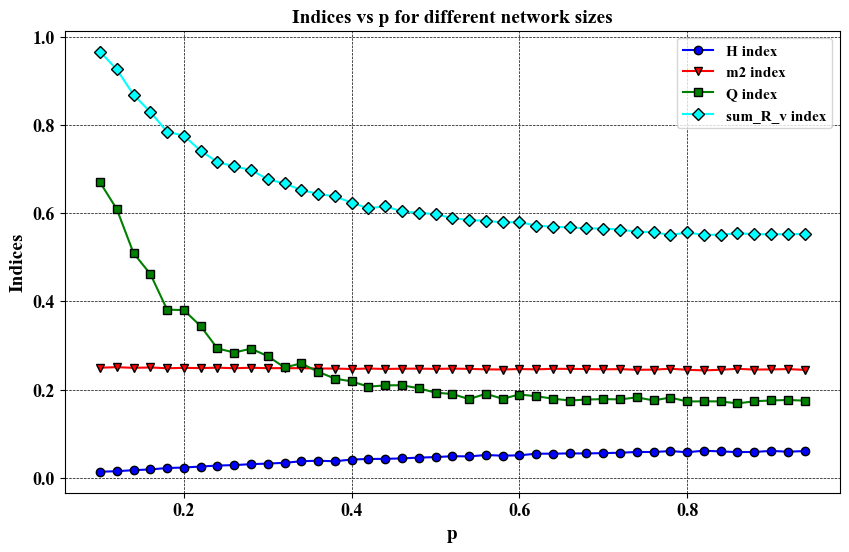

In [29]:
plt.figure(figsize=(10, 6))
font = {'family': 'times new roman', 'weight': 'bold', 'size': 11}

x_values = SW_df__total['p']
y_values = ['H', 'm2',  'Q','sum_R_v']
colors = ['b','r','g','cyan','orange']
markers = ['o', 'v', 's', 'D', '^']

# Plot
for i,y in enumerate(y_values):
    plt.plot(x_values, SW_df__total[y], marker=markers[i], color=colors[i],label=y+' index', markeredgecolor='black')

plt.xlabel('p', family= 'times new roman', weight='bold', size=14)
plt.ylabel('Indices', family= 'times new roman', weight='bold', size=14)
plt.title('Indices vs p for different network sizes', family= 'times new roman', weight='bold', size=14)
plt.legend(loc='upper right', prop=font)
plt.xticks(family= 'times new roman', weight='bold', size=13)
plt.yticks(family= 'times new roman', weight='bold', size=13)
plt.grid(color='black', linestyle='--', linewidth=0.5)
# plt.savefig("plots/Indices_sw.png" , dpi=1000, bbox_inches='tight')
plt.show()

# SF

In [30]:
gamma_values = np.round(np.arange(1.8, 5, 0.05), 1)
n_values = [50, 100, 150, 200]
number_of_loops = 30

results = []

for n in n_values:
    for gamma in gamma_values:

        H_sum, H_sum_geometric, H_sum_harmonic, m2_sum, Q_sum , gini_sum, estrada_sum, gintropy_sum = 0, 0, 0, 0, 0, 0, 0, 0

        for i in range(number_of_loops):

            G = create_scale_free_graph(n=n, gamma=gamma)

            P = stochastic_matrix_calculator(G)
            num_of_nodes = G.number_of_nodes()
            
            if isinstance(G, (nx.MultiGraph, nx.MultiDiGraph)):
                G = nx.Graph(G)
                # Estrada_, _ = get_Estrada_indices(G, P)
            estrada_index_value = estrada_index(G)
            H_value = calculate_H(G)[0]
            H_geometric = calculate_H_geometric(G)[0]

            # H_ = H_calculator(G,use_original_formula_H)[0]
            gini_value = calculate_gini(G)
            gintropy = gini_value * 2
            m2_ = est_moment(G, 10000, 2)[1]
            _, _, Q_ = synchronizability_calculator(G, for_real_networks=False)

            gini_sum += gini_value
            H_sum += H_value
            H_sum_geometric += H_geometric
            gintropy_sum += gintropy
            m2_sum += m2_
            Q_sum += Q_
            estrada_sum += estrada_index_value
            
            

        avg_H = H_sum / number_of_loops
        avg_H_geometric = H_sum_geometric / number_of_loops
        avg_m2 = m2_sum / number_of_loops
        avg_Q = Q_sum / number_of_loops
        gini = gini_sum / number_of_loops
        gintropy = gintropy_sum / number_of_loops
        estrada = estrada_sum / number_of_loops


        results.append({
            "n": n,
            "gamma": gamma,
            "H": avg_H,
            "H_geometric": avg_H_geometric,
            "m2": avg_m2,
            "Q": avg_Q,
            "gini": gini,
            "gintropy": gintropy,
            "estrada": estrada

        })

        print(f"Done: n={n}, gamma={gamma:.2f}")

        

    
    print(f'SF with {n} nodes Completed!')


SF_df_total = pd.DataFrame(results)
SF_df_total.to_csv("SavedNetworks/SF_df_total.csv")
SF_df_total

Done: n=50, gamma=1.80
Done: n=50, gamma=1.80
Done: n=50, gamma=1.90
Done: n=50, gamma=2.00
Done: n=50, gamma=2.00
Done: n=50, gamma=2.10
Done: n=50, gamma=2.10
Done: n=50, gamma=2.20
Done: n=50, gamma=2.20
Done: n=50, gamma=2.30
Done: n=50, gamma=2.30
Done: n=50, gamma=2.40
Done: n=50, gamma=2.40
Done: n=50, gamma=2.50
Done: n=50, gamma=2.50
Done: n=50, gamma=2.60
Done: n=50, gamma=2.60
Done: n=50, gamma=2.70
Done: n=50, gamma=2.70
Done: n=50, gamma=2.80
Done: n=50, gamma=2.80
Done: n=50, gamma=2.90
Done: n=50, gamma=2.90
Done: n=50, gamma=3.00
Done: n=50, gamma=3.00
Done: n=50, gamma=3.10
Done: n=50, gamma=3.10
Done: n=50, gamma=3.20
Done: n=50, gamma=3.20
Done: n=50, gamma=3.30
Done: n=50, gamma=3.30
Done: n=50, gamma=3.40
Done: n=50, gamma=3.40
Done: n=50, gamma=3.50
Done: n=50, gamma=3.50
Done: n=50, gamma=3.60
Done: n=50, gamma=3.60
Done: n=50, gamma=3.70
Done: n=50, gamma=3.70
Done: n=50, gamma=3.80
Done: n=50, gamma=3.80
Done: n=50, gamma=3.90
Done: n=50, gamma=3.90
Done: n=50,

d:\Personal\University\Paper\Network - Dr.Safaei\new_h_parameter\utils.py:644: RuntimeWarning: divide by zero encountered in log
  degrees_geo_mean = np.exp(np.mean(np.log(degrees)))
d:\Personal\University\Paper\Network - Dr.Safaei\new_h_parameter\utils.py:676: RuntimeWarning: divide by zero encountered in log
  degrees_geo_mean = np.exp(np.mean(np.log(degrees)))


Done: n=50, gamma=4.60
Done: n=50, gamma=4.60
Done: n=50, gamma=4.70
Done: n=50, gamma=4.70
Done: n=50, gamma=4.80
Done: n=50, gamma=4.80
Done: n=50, gamma=4.90
Done: n=50, gamma=4.90
Done: n=50, gamma=5.00
SF with 50 nodes Completed!
Done: n=100, gamma=1.80
Done: n=100, gamma=1.80
Done: n=100, gamma=1.90
Done: n=100, gamma=2.00
Done: n=100, gamma=2.00
Done: n=100, gamma=2.10
Done: n=100, gamma=2.10
Done: n=100, gamma=2.20
Done: n=100, gamma=2.20
Done: n=100, gamma=2.30
Done: n=100, gamma=2.30
Done: n=100, gamma=2.40
Done: n=100, gamma=2.40
Done: n=100, gamma=2.50
Done: n=100, gamma=2.50
Done: n=100, gamma=2.60
Done: n=100, gamma=2.60
Done: n=100, gamma=2.70
Done: n=100, gamma=2.70
Done: n=100, gamma=2.80
Done: n=100, gamma=2.80
Done: n=100, gamma=2.90
Done: n=100, gamma=2.90
Done: n=100, gamma=3.00
Done: n=100, gamma=3.00
Done: n=100, gamma=3.10
Done: n=100, gamma=3.10
Done: n=100, gamma=3.20
Done: n=100, gamma=3.20
Done: n=100, gamma=3.30
Done: n=100, gamma=3.30
Done: n=100, gamma=3.

,n,gamma,H,H_geometric,m2,Q,gini,gintropy,estrada
0,50,1.8,0.323133,0.322133,0.157240,50.737039,0.470667,0.941333,0.424836
1,50,1.8,0.334233,0.333233,0.146463,50.958437,0.482000,0.964000,0.445243
2,50,1.9,0.313800,0.312800,0.168507,52.494645,0.461333,0.922667,0.411957
3,50,2.0,0.276767,0.275767,0.202973,62.088221,0.421667,0.843333,0.351306
4,50,2.0,0.273967,0.272967,0.200223,54.123742,0.421667,0.843333,0.355200
...,...,...,...,...,...,...,...,...,...
251,200,4.8,0.012700,0.011700,0.481343,2331.152383,0.034333,0.068667,0.008435
252,200,4.8,0.013267,0.012267,0.482713,2540.785636,0.034000,0.068000,0.008706
253,200,4.9,0.012200,0.011200,0.482553,2451.610130,0.033667,0.067333,0.007975
254,200,4.9,0.011800,0.010800,0.483337,2500.618960,0.031667,0.063333,0.007744


In [31]:
SF_df_total = pd.read_csv("SavedNetworks/SF_df_total.csv")

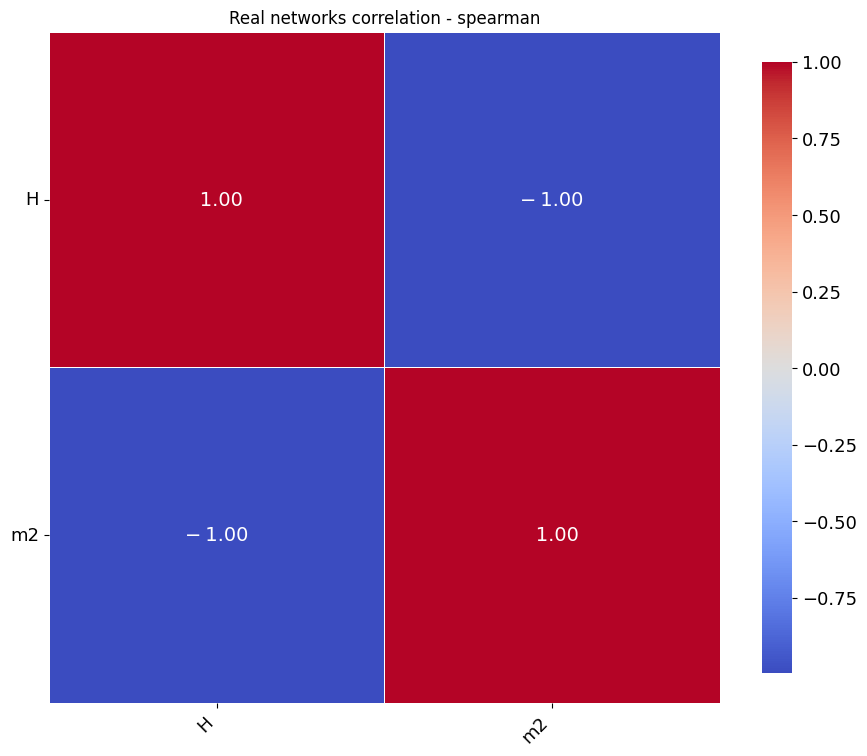

In [32]:
new_er_df = SF_df_total[['H', 'm2']]
corr_matrix = new_er_df.corr(method='spearman')
def format_corr(val):
    s = f"{val:.2f}"
    if s.startswith('-'):
        return '−\u2009' + s[1:]  
    else:
        return '\u2002' + s        

annot_labels = corr_matrix.map(format_corr)

fig, ax = plt.subplots(figsize=(9, 8))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr_matrix,
    annot=annot_labels,
    fmt='', 
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.7,
    cbar_kws={"shrink": 0.8, "aspect": 20},
    annot_kws={"fontsize": 14},
    ax=ax
)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=13, rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=13, rotation=0)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=13)

plt.tight_layout(pad=0.8)
plt.title("Real networks correlation - spearman")

# plt.savefig('plots/real_graphs_heatmap.png', facecolor='white', dpi=600, bbox_inches='tight')
plt.show()

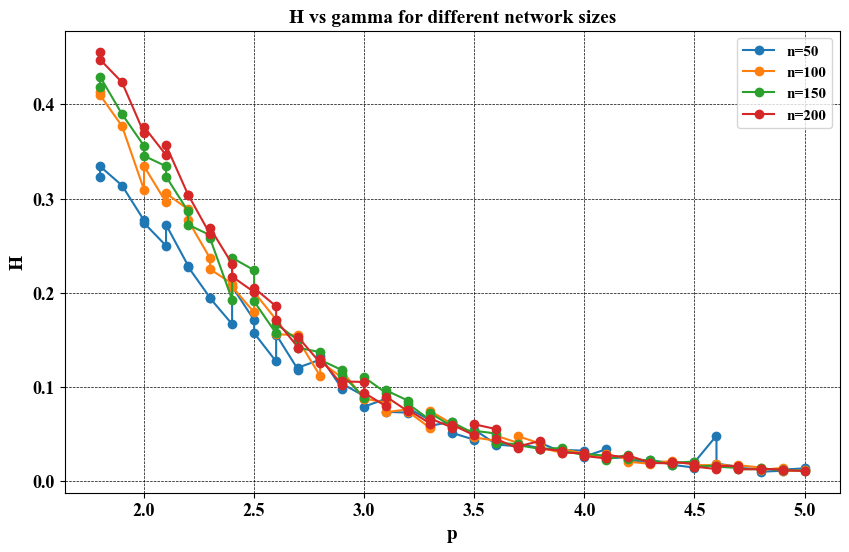

In [33]:
plt.figure(figsize=(10, 6))
font = {'family': 'times new roman', 'weight': 'bold', 'size': 11}

n_values = SF_df_total['n'].unique()

for n in n_values:
    subset = SF_df_total[SF_df_total['n'] == n]
    plt.plot(subset['gamma'], subset['H'], marker='o', label=f'n={n}')

plt.xlabel('p', family= 'times new roman', weight='bold', size=14)
plt.ylabel('H', family= 'times new roman', weight='bold', size=14)
plt.title('H vs gamma for different network sizes', family= 'times new roman', weight='bold', size=14)
plt.legend(loc='upper right', prop=font)
plt.xticks(family= 'times new roman', weight='bold', size=13)
plt.yticks(family= 'times new roman', weight='bold', size=13)
plt.grid(color='black', linestyle='--', linewidth=0.5)
# plt.savefig("plots/h_sf.png" , dpi=1000, bbox_inches='tight')
plt.show()

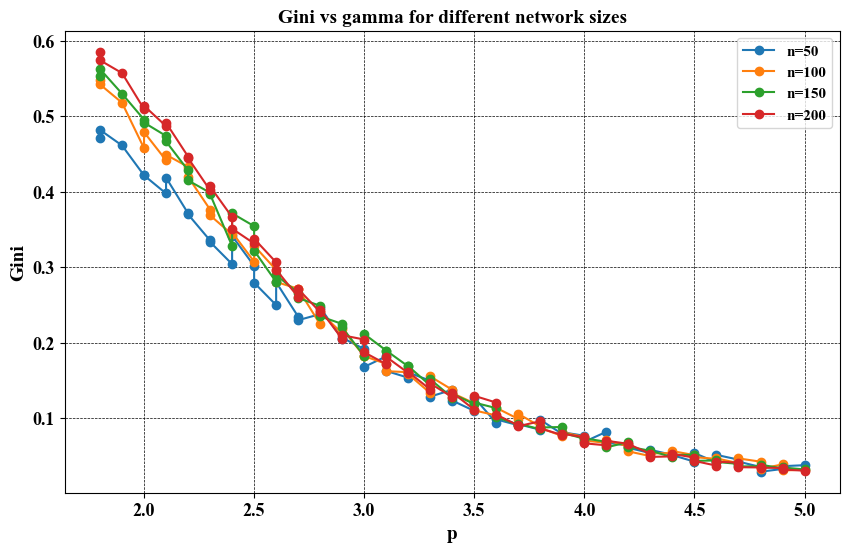

In [34]:
plt.figure(figsize=(10, 6))
font = {'family': 'times new roman', 'weight': 'bold', 'size': 11}

n_values = SF_df_total['n'].unique()

for n in n_values:
    subset = SF_df_total[SF_df_total['n'] == n]
    plt.plot(subset['gamma'], subset['gini'], marker='o', label=f'n={n}')

plt.xlabel('p', family= 'times new roman', weight='bold', size=14)
plt.ylabel('Gini', family= 'times new roman', weight='bold', size=14)
plt.title('Gini vs gamma for different network sizes', family= 'times new roman', weight='bold', size=14)
plt.legend(loc='upper right', prop=font)
plt.xticks(family= 'times new roman', weight='bold', size=13)
plt.yticks(family= 'times new roman', weight='bold', size=13)
plt.grid(color='black', linestyle='--', linewidth=0.5)
# plt.savefig("plots/gini_sf.png" , dpi=1000, bbox_inches='tight')
plt.show()

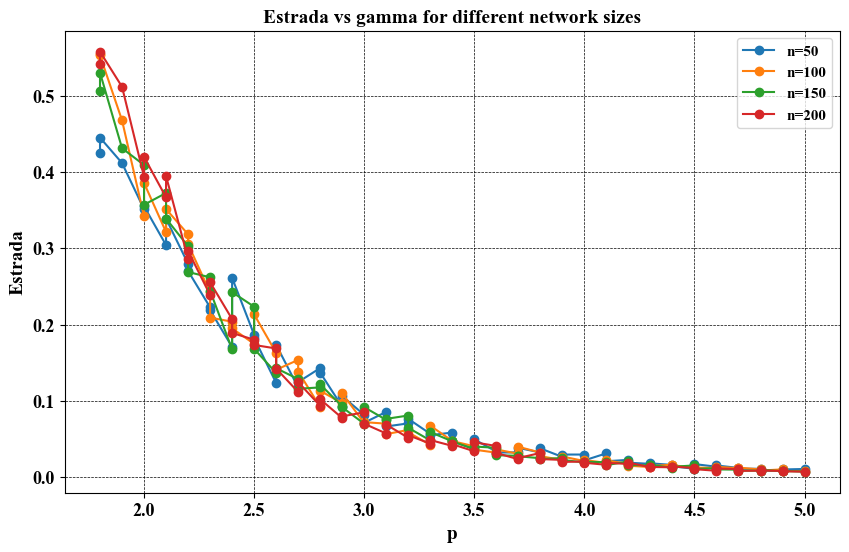

In [35]:
plt.figure(figsize=(10, 6))
font = {'family': 'times new roman', 'weight': 'bold', 'size': 11}

n_values = SF_df_total['n'].unique()

for n in n_values:
    subset = SF_df_total[SF_df_total['n'] == n]
    plt.plot(subset['gamma'], subset['estrada'], marker='o', label=f'n={n}')

plt.xlabel('p', family= 'times new roman', weight='bold', size=14)
plt.ylabel('Estrada', family= 'times new roman', weight='bold', size=14)
plt.title('Estrada vs gamma for different network sizes', family= 'times new roman', weight='bold', size=14)
plt.legend(loc='upper right', prop=font)
plt.xticks(family= 'times new roman', weight='bold', size=13)
plt.yticks(family= 'times new roman', weight='bold', size=13)
plt.grid(color='black', linestyle='--', linewidth=0.5)
# plt.savefig("plots/Estrada_sf.png" , dpi=1000, bbox_inches='tight')
plt.show()

In [36]:
SF_results = dict()
n = 100
gamma_values = np.round(np.arange(1.8, 5, 0.05), 1)

for gamma in tqdm(gamma_values):
    SF_results[gamma]=dict()
    SF_H_values = list()
    SF_H_differences = list()
    H_sum, m2_sum, Q_sum, R_sum, sum_R_v_sum = 0, 0, 0, 0, 0
    
    number_of_loops = 30
    
    for i in range(number_of_loops):
        G = create_scale_free_graph(n=n, gamma=gamma)
        # G = scale_free_graph(n=n, gamma=gamma)
        #P = stochastic_matrix_calculator(G)
        num_of_nodes = G.number_of_nodes()
        
        #indices = get_all_indices(G, P, use_original_formula_H)
        H = calculate_H(G)[0]
        SF_H_values.append(H)
        H_sum += H
        m2_sum += est_moment(G, 10000, 2)[1]
        _, _, Q = synchronizability_calculator(G, for_real_networks=False)
        Q_sum += Q / (num_of_nodes - 1)
        #R_sum += normalized_graph_resistance(G)
        try:
            inner= total_vertex_resistance(G)
        except:
            inner = 0
            
        sum_R_v_sum += inner
    SF_results[gamma]['H'] = H_sum / number_of_loops
    SF_results[gamma]['m2'] = m2_sum / number_of_loops
    SF_results[gamma]['Q'] = Q_sum / number_of_loops
    #ER_results[p]['R'] = R_sum / number_of_loops
    SF_results[gamma]['sum_R_v'] = sum_R_v_sum / number_of_loops
    
    #print(f'ER with p={p} Completed!')

SF_df__total = pd.DataFrame(SF_results).T
SF_df__total.reset_index(drop=False, inplace=True)
SF_df__total.rename(columns={'index':"gamma"}, inplace=True)
SF_df__total.to_csv("SavedNetworks/SF_df__total.csv")
SF_df__total

100%|██████████| 64/64 [01:20<00:00,  1.26s/it]


,gamma,H,m2,Q,sum_R_v
0,1.8,0.727233,0.112747,7.956397,0.046905
1,1.9,0.626433,0.133207,3.975740,0.071586
2,2.0,0.508300,0.173447,4.405931,0.144451
3,2.1,0.439033,0.194803,2.819105,0.177632
4,2.2,0.375400,0.227233,2.309641,0.256985
5,2.3,0.281633,0.269940,2.127961,0.424532
6,2.4,0.241333,0.287667,1.955008,0.508683
7,2.5,0.232100,0.302357,2.064632,0.591023
8,2.6,0.179133,0.336670,2.022091,0.783897
9,2.7,0.174300,0.340310,2.385089,0.901647


In [37]:
SF_df__total = pd.read_csv("SavedNetworks/SF_df__total.csv")

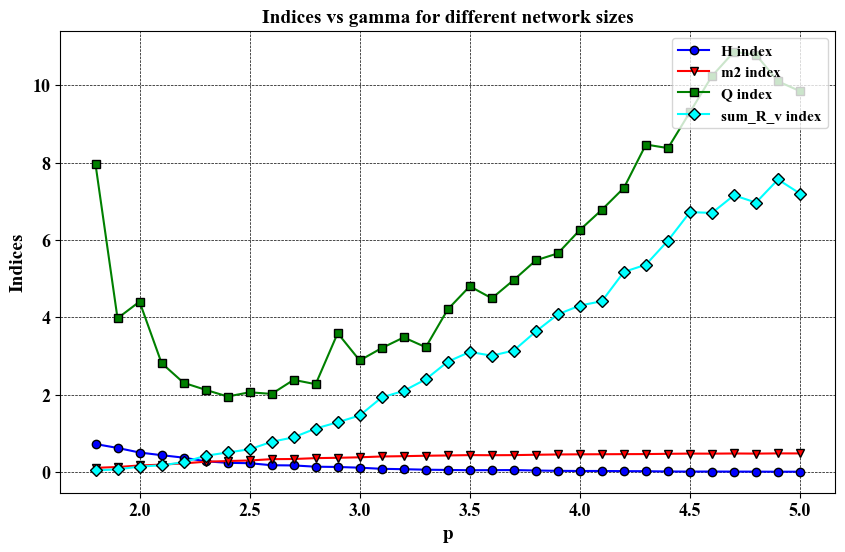

In [38]:
plt.figure(figsize=(10, 6))
font = {'family': 'times new roman', 'weight': 'bold', 'size': 11}


x_values = SF_df__total['gamma']
y_values = ['H', 'm2',  'Q','sum_R_v']
colors = ['b','r','g','cyan','orange']
markers = ['o', 'v', 's', 'D', '^']

# Plot
for i,y in enumerate(y_values):
    plt.plot(x_values, SF_df__total[y], marker=markers[i], color=colors[i],label=y+' index', markeredgecolor='black')

plt.xlabel('p', family= 'times new roman', weight='bold', size=14)
plt.ylabel('Indices', family= 'times new roman', weight='bold', size=14)
plt.title('Indices vs gamma for different network sizes', family= 'times new roman', weight='bold', size=14)
plt.legend(loc='upper right', prop=font)
plt.xticks(family= 'times new roman', weight='bold', size=13)
plt.yticks(family= 'times new roman', weight='bold', size=13)
plt.grid(color='black', linestyle='--', linewidth=0.5)
# plt.savefig("plots/multi_sf.png" , dpi=1000, bbox_inches='tight')
plt.show()

# ER

In [2]:
n = 100
p_values = np.arange(0.15,0.95,0.002)
num_of_loops = 100
use_original_formula_H = False
H_values = list()

for p in tqdm(p_values):
    H_sum = 0
    for i in range(num_of_loops):
        G = nx.erdos_renyi_graph(n, p)
        H, _ = H_calculator__(G, use_original_formula_H)
        H_sum += H
    H = H_sum/num_of_loops
    H_values.append(H)

100%|██████████| 400/400 [06:47<00:00,  1.02s/it]


In [3]:
df = pd.DataFrame(data=H_values, columns=['H'])
df.insert(0,'p', p_values)
df.to_csv("SavedNetworks/ER_mesh.csv", index=False)
df[30:50]

,p,H
30,0.210,0.85029
31,0.212,0.84586
32,0.214,0.84375
33,0.216,0.84807
34,0.218,0.83225
35,0.220,0.83268
36,0.222,0.82754
37,0.224,0.82729
38,0.226,0.82537
39,0.228,0.81440


In [4]:
df = pd.read_csv("SavedNetworks/ER_mesh.csv")

In [5]:
H_values = df['H'].values
H_values.shape, H_values.reshape(-1,1).shape

p_values = df['p'].values
H_values = df['H'].values

p_grid_x, p_grid_y = np.meshgrid(p_values, p_values)

H_diff = np.round(np.abs(H_values.reshape(-1,1) - H_values),2)
print(H_diff)

[[0.   0.01 0.   ... 0.92 0.92 0.92]
 [0.01 0.   0.   ... 0.91 0.91 0.91]
 [0.   0.   0.   ... 0.91 0.91 0.91]
 ...
 [0.92 0.91 0.91 ... 0.   0.   0.  ]
 [0.92 0.91 0.91 ... 0.   0.   0.  ]
 [0.92 0.91 0.91 ... 0.   0.   0.  ]]


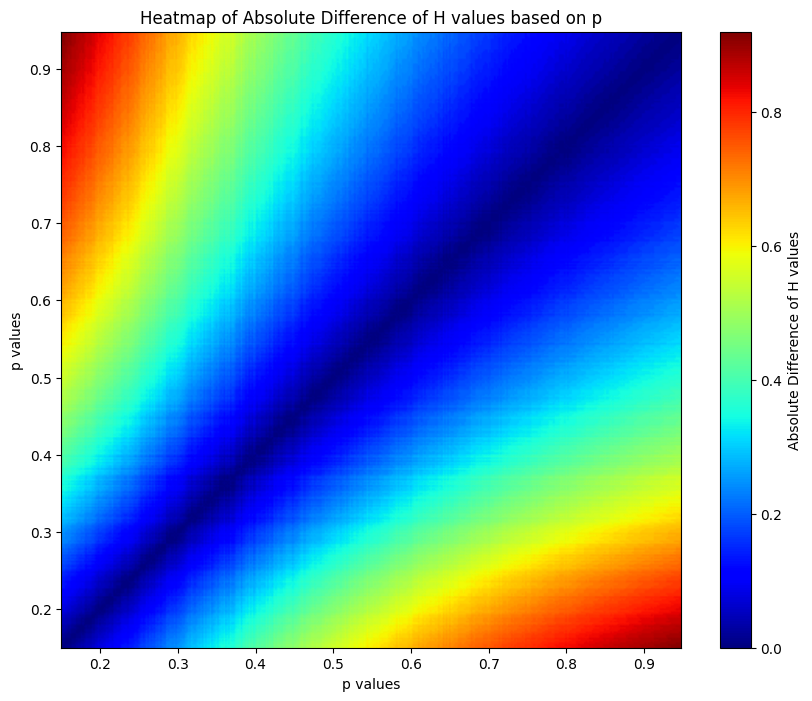

In [6]:
plt.figure(figsize=(10, 8))
plt.pcolormesh(p_grid_x, p_grid_y, H_diff, shading='gouraud', cmap='jet', edgecolors='face')
plt.colorbar(label='Absolute Difference of H values')
plt.xlabel('p values')
plt.ylabel('p values')
plt.title('Heatmap of Absolute Difference of H values based on p')
# plt.savefig('paper_plots/Random/ER_H_thermalmap.png', facecolor='white', dpi=300, bbox_inches='tight')
plt.show()

# BA

In [7]:
n = 100
m_values = np.arange(2, n-1, 1)
num_of_loops = 100
use_original_formula_H = False
H_values = list()

for m in tqdm(m_values):
    H_sum = 0
    for i in range(num_of_loops):
        G = nx.barabasi_albert_graph(n=n, m=m, initial_graph=nx.complete_graph(m+1))
        H, _ = H_calculator__(G, use_original_formula_H)
        H_sum += H
    H = H_sum/num_of_loops
    H_values.append(H)

100%|██████████| 97/97 [02:21<00:00,  1.46s/it]


In [8]:
df = pd.DataFrame(data=H_values, columns=['H'])
df.insert(0,'m', m_values)
df.to_csv("SavedNetworks/BA_mesh.csv", index=False)
m_values = df['m'].values
H_values = df['H'].values

m_grid_x, m_grid_y = np.meshgrid(m_values, m_values)

H_diff = np.abs(H_values.reshape(-1,1) - H_values)

m_grid_x.shape

(97, 97)

In [9]:
df = pd.read_csv("SavedNetworks/BA_mesh.csv")

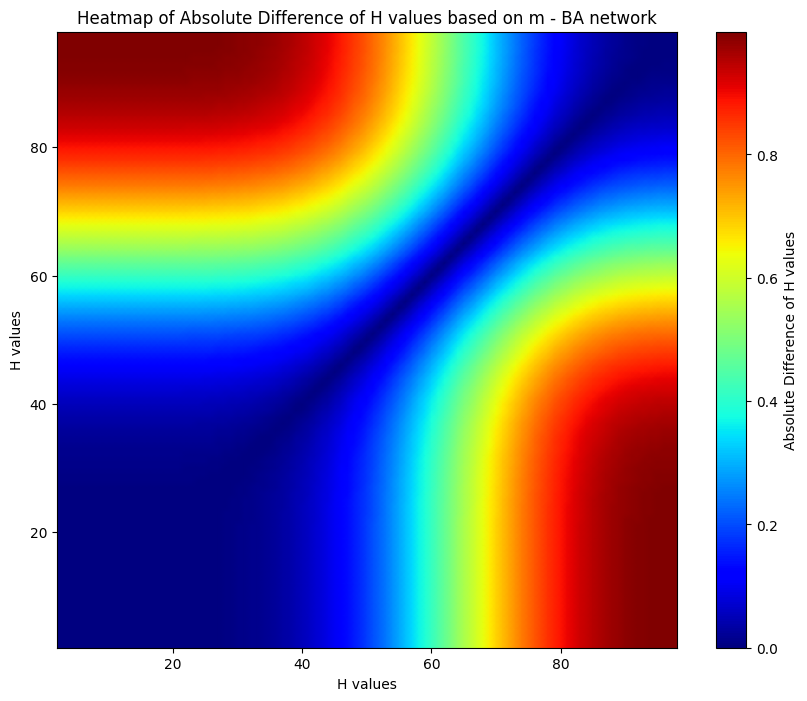

In [10]:
plt.figure(figsize=(10, 8))
plt.pcolormesh(m_grid_x, m_grid_y, H_diff, shading='gouraud', cmap='jet', edgecolors='face')
plt.colorbar(label='Absolute Difference of H values')
plt.xlabel('H values')
plt.ylabel('H values')
plt.title('Heatmap of Absolute Difference of H values based on m - BA network')
# plt.savefig('plots/ba_heatmap.png', facecolor='white', dpi=1000, bbox_inches='tight')
plt.show()

# SW

In [11]:
n = 150
p_values = np.arange(0.15,0.95,0.002)
num_of_loops = 100
k=4
use_original_formula_H = False
H_values = list()

for p in tqdm(p_values):
    H_sum = 0
    for i in range(num_of_loops):
        G = nx.watts_strogatz_graph(n=n,k=k, p=p)
        H, _ = H_calculator__(G, use_original_formula=use_original_formula_H)
        H_sum += H
    H = H_sum/num_of_loops
    H_values.append(H)

100%|██████████| 400/400 [09:30<00:00,  1.43s/it]


In [12]:
df = pd.DataFrame(data=H_values, columns=['H'])
df.insert(0,'p', p_values)
df.to_csv("SavedNetworks/SW_mesh.csv", index=False)
p_values = df['p'].values
H_values = df['H'].values

p_grid_x, p_grid_y = np.meshgrid(p_values, p_values)

H_diff = np.round(np.abs(H_values.reshape(-1,1) - H_values),2)
print(H_diff)

[[0.   0.   0.   ... 0.08 0.08 0.08]
 [0.   0.   0.   ... 0.07 0.07 0.07]
 [0.   0.   0.   ... 0.07 0.07 0.07]
 ...
 [0.08 0.07 0.07 ... 0.   0.   0.  ]
 [0.08 0.07 0.07 ... 0.   0.   0.  ]
 [0.08 0.07 0.07 ... 0.   0.   0.  ]]


In [13]:
df = pd.read_csv("SavedNetworks/SW_mesh.csv")

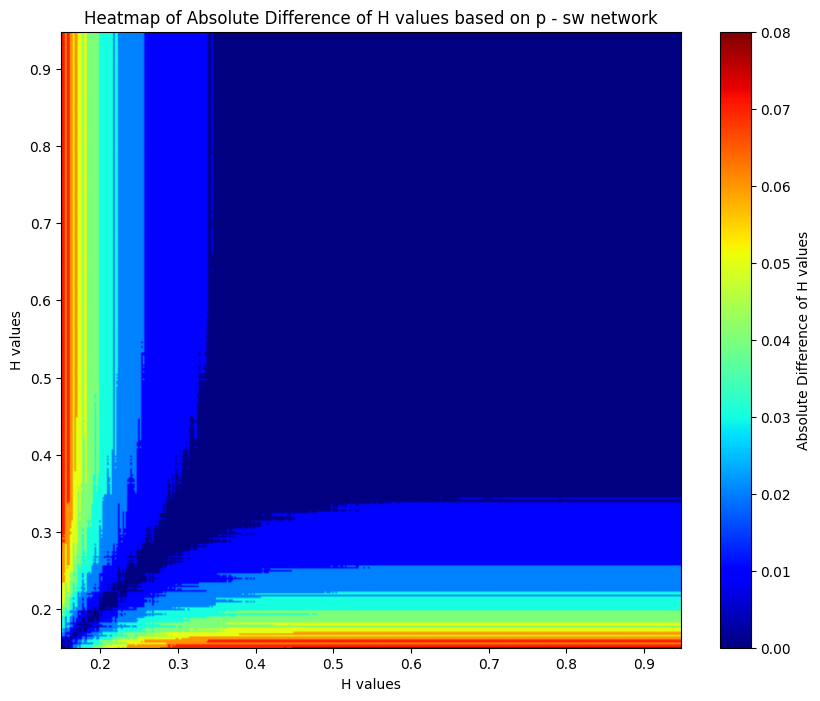

In [14]:
plt.figure(figsize=(10, 8))
plt.pcolormesh(p_grid_x, p_grid_y, H_diff, shading='gouraud', cmap='jet', edgecolors='face')
plt.colorbar(label='Absolute Difference of H values')
plt.xlabel('H values')
plt.ylabel('H values')
plt.title('Heatmap of Absolute Difference of H values based on p - sw network')
# plt.savefig('plots/sw_heatmap.png', facecolor='white', dpi=1000, bbox_inches='tight')
plt.show()

# SF

In [16]:
n = 100
gamma_values = np.round(np.arange(1.8, 5, 0.05), 1)
num_of_loops = 100
use_original_formula_H = False
H_values = list()

for gamma in tqdm(gamma_values):
    H_sum = 0
    for i in range(num_of_loops):
        G = create_scale_free_graph(n=n, gamma=gamma)
        H, _ = H_calculator__(G, use_original_formula_H)
        H_sum += H
    H = H_sum/num_of_loops
    H_values.append(H)
    
    
df = pd.DataFrame(data=H_values, columns=['H'])
df.insert(0,'gamma', gamma_values)
df.to_csv("SavedNetworks/SF_mesh.csv", index=False)

 80%|███████▉  | 51/64 [00:35<00:09,  1.40it/s]d:\Personal\University\Paper\Network - Dr.Safaei\new_h_parameter\utils.py:1157: RuntimeWarning: divide by zero encountered in log
  degrees_geo_mean = np.exp(np.mean(np.log(degrees)))
100%|██████████| 64/64 [00:45<00:00,  1.41it/s]


In [17]:
df = pd.read_csv("SavedNetworks/SF_mesh.csv")

In [18]:
gamma_values = df['gamma'].values
H_values = df['H'].values

gamma_grid_x, gamma_grid_y = np.meshgrid(gamma_values, gamma_values)

H_diff = np.abs(H_values.reshape(-1,1) - H_values)

gamma_grid_x.shape


(64, 64)

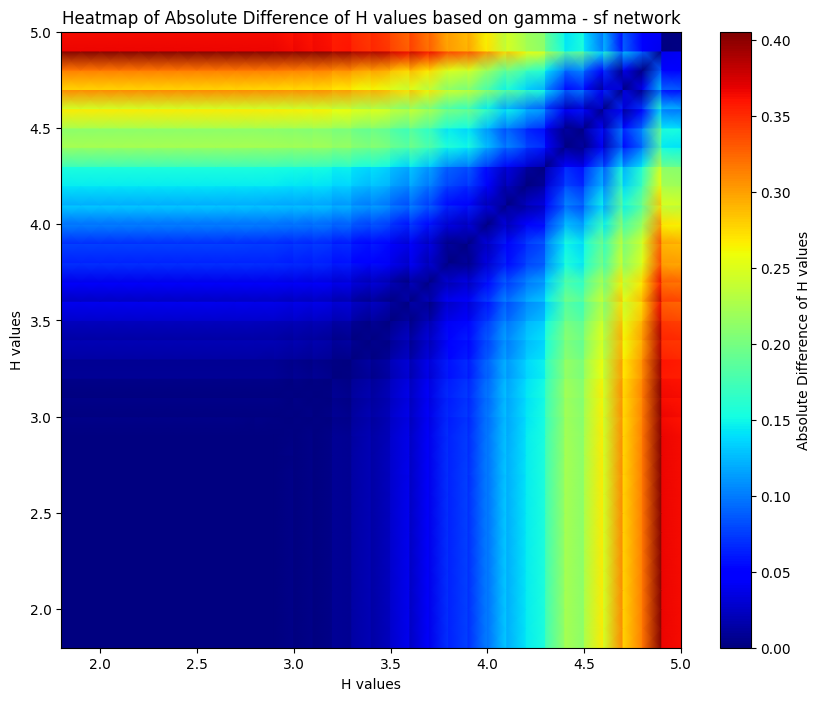

In [19]:
plt.figure(figsize=(10, 8))
plt.pcolormesh(gamma_grid_x, gamma_grid_y, H_diff, shading='gouraud', cmap='jet', edgecolors='face')
plt.colorbar(label='Absolute Difference of H values')
plt.xlabel('H values')
plt.ylabel('H values')
plt.title('Heatmap of Absolute Difference of H values based on gamma - sf network')
plt.savefig('plots/sf_heatmap.png', facecolor='white', dpi=1000, bbox_inches='tight')
plt.show()

#######################################

In [20]:
def compute_H_over_sizes_geometric(
    sizes=[20,40,60,80,100,120,140,160, 180,200],
    runs=10,
):


    ER_means, ER_stds = [], []
    WS_means, WS_stds = [], []
    BA_means, BA_stds = [], []
    SF_means_25, SF_stds_25 = [], []
    SF_means_5, SF_stds_5 = [], []


    for n in sizes:
        ER_vals = []
        WS_vals = []
        BA_vals = []
        SF_vals_25 = []
        SF_vals_5 = []


        for _ in range(runs):
            G_er = nx.erdos_renyi_graph(n, p=0.5)
            H_er = calculate_H_geometric(G_er)[0]
            ER_vals.append(H_er)

            G_ws = nx.watts_strogatz_graph(n, k=4, p=0.3)
            H_ws = calculate_H_geometric(G_ws)[0]
            WS_vals.append(H_ws)

            G_ba = nx.barabasi_albert_graph(n, m=3)
            H_ba = calculate_H_geometric(G_ba)[0]
            BA_vals.append(H_ba)

            G_sf_25 = create_scale_free_graph(n, gamma=2.7)
            H_sf_25 = calculate_H_geometric(G_sf_25)[0]
            SF_vals_25.append(H_sf_25)

            G_sf_5 = create_scale_free_graph(n, gamma=5)
            H_sf_5 = calculate_H_geometric(G_sf_5)[0]
            SF_vals_5.append(H_sf_5)



        ER_means.append(np.mean(ER_vals))
        ER_stds.append(np.std(ER_vals))

        WS_means.append(np.mean(WS_vals))
        WS_stds.append(np.std(WS_vals))

        BA_means.append(np.mean(BA_vals))
        BA_stds.append(np.std(BA_vals))

        SF_means_25.append(np.mean(SF_vals_25))
        SF_stds_25.append(np.std(SF_vals_25))

        SF_means_5.append(np.mean(SF_vals_5))
        SF_stds_5.append(np.std(SF_vals_5))

    SF_stds_25 = np.divide(SF_stds_25, 10)
    SF_stds_5 = np.divide(SF_stds_5, 10)
    return {
        "sizes": sizes,
        "ER_mean": ER_means, "ER_std": ER_stds,
        "WS_mean": WS_means, "WS_std": WS_stds,
        "BA_mean": BA_means, "BA_std": BA_stds,
        "SF_mean_25": SF_means_25, "SF_std_25": SF_stds_25,
        "SF_mean_5": SF_means_5, "SF_std_5": SF_stds_5,
    }

In [21]:
def plot_H_results(results):
    sizes = results["sizes"]
    
    ER_mean, ER_std = results["ER_mean"], results["ER_std"]
    WS_mean, WS_std = results["WS_mean"], results["WS_std"]
    BA_mean, BA_std = results["BA_mean"], results["BA_std"]
    SF_mean_25, SF_std_25 = results["SF_mean_25"], results["SF_std_25"]
    SF_mean_5, SF_std_5 = results["SF_mean_5"], results["SF_std_5"]

    plt.figure(figsize=(8,5))


    plt.errorbar(sizes, BA_mean, yerr=BA_std,
                 marker='o', color='black', label="BA")

    plt.plot(sizes, np.array(BA_mean) + np.array(BA_std),
             linestyle='dotted', color='black')
    plt.plot(sizes, np.array(BA_mean) - np.array(BA_std),
             linestyle='dotted', color='black')

    plt.errorbar(sizes, WS_mean, yerr=WS_std,
                 marker='^', color='green', label="WS")

    plt.plot(sizes, np.array(WS_mean) + np.array(WS_std),
             linestyle='dotted', color='green')
    plt.plot(sizes, np.array(WS_mean) - np.array(WS_std),
             linestyle='dotted', color='green')

    plt.errorbar(sizes, ER_mean, yerr=ER_std,
                 marker='s', color='blue', label="ER")

    plt.plot(sizes, np.array(ER_mean) + np.array(ER_std),
             linestyle='dotted', color='blue')
    plt.plot(sizes, np.array(ER_mean) - np.array(ER_std),
             linestyle='dotted', color='blue')

    plt.errorbar(sizes, SF_mean_25, yerr=SF_std_25,
                 marker='D', color='orange', label="SF (γ=2.7)")

    plt.plot(sizes, np.array(SF_mean_25) + np.array(SF_std_25),
             linestyle='dotted', color='orange')
    plt.plot(sizes, np.array(SF_mean_25) - np.array(SF_std_25),
             linestyle='dotted', color='orange')
    
    plt.errorbar(sizes, SF_mean_5, yerr=SF_std_5,
                 marker='v', color='red', label="SF (γ=5)")
    plt.plot(sizes, np.array(SF_mean_5) + np.array(SF_std_5),
             linestyle='dotted', color='red')
    plt.plot(sizes, np.array(SF_mean_5) - np.array(SF_std_5),
             linestyle='dotted', color='red')
    
    plt.xlabel("Graph size")
    plt.ylabel("H")
    plt.title("Heterogeneity vs Graph size for ER / WS / BA / SF")
    plt.legend()
    plt.grid()

    plt.show()

d:\Personal\University\Paper\Network - Dr.Safaei\new_h_parameter\utils.py:676: RuntimeWarning: divide by zero encountered in log
  degrees_geo_mean = np.exp(np.mean(np.log(degrees)))


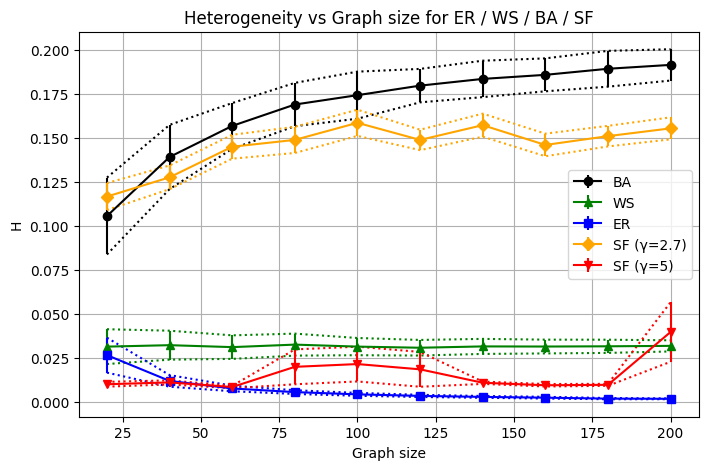

In [22]:
results = compute_H_over_sizes_geometric(runs=100)
plot_H_results(results)

In [23]:
def compute_estrada(
    sizes=[20,40,60,80,100,120,140,160, 180,200],
    runs=10,
):


    ER_means, ER_stds = [], []
    WS_means, WS_stds = [], []
    BA_means, BA_stds = [], []
    SF_means_25, SF_stds_25 = [], []
    SF_means_5, SF_stds_5 = [], []


    for n in sizes:
        ER_vals = []
        WS_vals = []
        BA_vals = []
        SF_vals_25 = []
        SF_vals_5 = []


        for _ in range(runs):
            G_er = nx.erdos_renyi_graph(n, p=0.5)
            H_er = estrada_index(G_er)
            ER_vals.append(H_er)

            G_ws = nx.watts_strogatz_graph(n, k=4, p=0.3)
            H_ws = estrada_index(G_ws)
            WS_vals.append(H_ws)

            G_ba = nx.barabasi_albert_graph(n, m=3)
            H_ba = estrada_index(G_ba)
            BA_vals.append(H_ba)

            G_sf_25 = create_scale_free_graph(n, gamma=2.7)
            H_sf_25 = estrada_index(G_sf_25)
            SF_vals_25.append(H_sf_25)

            G_sf_5 = create_scale_free_graph(n, gamma=6)
            H_sf_5 = estrada_index(G_sf_5)
            SF_vals_5.append(H_sf_5)



        ER_means.append(np.mean(ER_vals))
        ER_stds.append(np.std(ER_vals))

        WS_means.append(np.mean(WS_vals))
        WS_stds.append(np.std(WS_vals))

        BA_means.append(np.mean(BA_vals))
        BA_stds.append(np.std(BA_vals))

        SF_means_25.append(np.mean(SF_vals_25))
        SF_stds_25.append(np.std(SF_vals_25))

        SF_means_5.append(np.mean(SF_vals_5))
        SF_stds_5.append(np.std(SF_vals_5))

    SF_stds_25 = np.divide(SF_stds_25, 10)
    SF_stds_5 = np.divide(SF_stds_5, 10)
    return {
        "sizes": sizes,
        "ER_mean": ER_means, "ER_std": ER_stds,
        "WS_mean": WS_means, "WS_std": WS_stds,
        "BA_mean": BA_means, "BA_std": BA_stds,
        "SF_mean_25": SF_means_25, "SF_std_25": SF_stds_25,
        "SF_mean_5": SF_means_5, "SF_std_5": SF_stds_5,
    }

In [24]:
def plot_estrada_results(results):
    sizes = results["sizes"]
    
    ER_mean, ER_std = results["ER_mean"], results["ER_std"]
    WS_mean, WS_std = results["WS_mean"], results["WS_std"]
    BA_mean, BA_std = results["BA_mean"], results["BA_std"]
    SF_mean_25, SF_std_25 = results["SF_mean_25"], results["SF_std_25"]
    SF_mean_5, SF_std_5 = results["SF_mean_5"], results["SF_std_5"]

    plt.figure(figsize=(8,5))


    plt.errorbar(sizes, BA_mean, yerr=BA_std,
                 marker='o', color='black', label="BA")

    plt.plot(sizes, np.array(BA_mean) + np.array(BA_std),
             linestyle='dotted', color='black')
    plt.plot(sizes, np.array(BA_mean) - np.array(BA_std),
             linestyle='dotted', color='black')

    plt.errorbar(sizes, WS_mean, yerr=WS_std,
                 marker='^', color='green', label="WS")

    plt.plot(sizes, np.array(WS_mean) + np.array(WS_std),
             linestyle='dotted', color='green')
    plt.plot(sizes, np.array(WS_mean) - np.array(WS_std),
             linestyle='dotted', color='green')

    plt.errorbar(sizes, ER_mean, yerr=ER_std,
                 marker='s', color='blue', label="ER")

    plt.plot(sizes, np.array(ER_mean) + np.array(ER_std),
             linestyle='dotted', color='blue')
    plt.plot(sizes, np.array(ER_mean) - np.array(ER_std),
             linestyle='dotted', color='blue')

    plt.errorbar(sizes, SF_mean_25, yerr=SF_std_25,
                 marker='D', color='orange', label="SF (γ=2.7)")

    plt.plot(sizes, np.array(SF_mean_25) + np.array(SF_std_25),
             linestyle='dotted', color='orange')
    plt.plot(sizes, np.array(SF_mean_25) - np.array(SF_std_25),
             linestyle='dotted', color='orange')
    
    plt.errorbar(sizes, SF_mean_5, yerr=SF_std_5,
                 marker='v', color='red', label="SF (γ=5)")
    plt.plot(sizes, np.array(SF_mean_5) + np.array(SF_std_5),
             linestyle='dotted', color='red')
    plt.plot(sizes, np.array(SF_mean_5) - np.array(SF_std_5),
             linestyle='dotted', color='red')
    
    plt.xlabel("Graph size")
    plt.ylabel("Estrada")
    plt.title("Heterogeneity vs Graph size for ER / WS / BA / SF")
    plt.legend()
    plt.grid()

    plt.show()

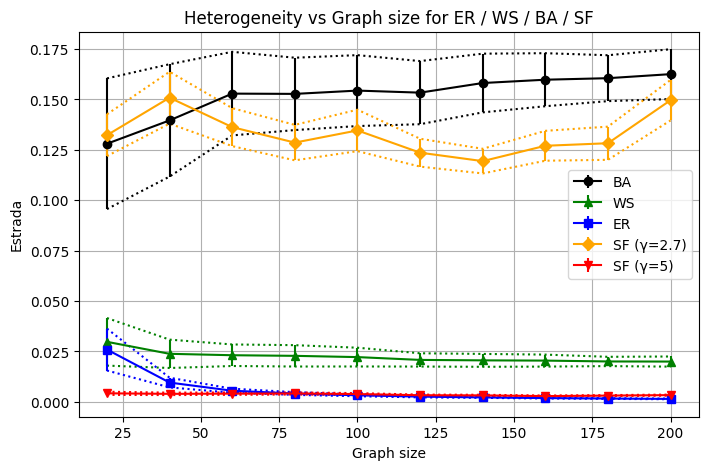

In [25]:
results = compute_estrada(runs=100)
plot_estrada_results(results)

In [26]:
def compute_gini_(
    sizes=[20,40,60,80,100,120,140,160, 180,200],
    runs=10,
):


    ER_means, ER_stds = [], []
    WS_means, WS_stds = [], []
    BA_means, BA_stds = [], []
    SF_means_25, SF_stds_25 = [], []
    SF_means_5, SF_stds_5 = [], []


    for n in sizes:
        ER_vals = []
        WS_vals = []
        BA_vals = []
        SF_vals_25 = []
        SF_vals_5 = []


        for _ in range(runs):
            G_er = nx.erdos_renyi_graph(n, p=0.5)
            H_er = calculate_gini(G_er)
            ER_vals.append(H_er)

            G_ws = nx.watts_strogatz_graph(n, k=4, p=0.3)
            H_ws = calculate_gini(G_ws)
            WS_vals.append(H_ws)

            G_ba = nx.barabasi_albert_graph(n, m=3)
            H_ba = calculate_gini(G_ba)
            BA_vals.append(H_ba)

            G_sf_25 = create_scale_free_graph(n, gamma=2.7)
            H_sf_25 = calculate_gini(G_sf_25)
            SF_vals_25.append(H_sf_25)

            G_sf_5 = create_scale_free_graph(n, gamma=6)
            H_sf_5 = calculate_gini(G_sf_5)
            SF_vals_5.append(H_sf_5)



        ER_means.append(np.mean(ER_vals))
        ER_stds.append(np.std(ER_vals))

        WS_means.append(np.mean(WS_vals))
        WS_stds.append(np.std(WS_vals))

        BA_means.append(np.mean(BA_vals))
        BA_stds.append(np.std(BA_vals))

        SF_means_25.append(np.mean(SF_vals_25))
        SF_stds_25.append(np.std(SF_vals_25))

        SF_means_5.append(np.mean(SF_vals_5))
        SF_stds_5.append(np.std(SF_vals_5))

    SF_stds_25 = np.divide(SF_stds_25, 10)
    SF_stds_5 = np.divide(SF_stds_5, 10)
    return {
        "sizes": sizes,
        "ER_mean": ER_means, "ER_std": ER_stds,
        "WS_mean": WS_means, "WS_std": WS_stds,
        "BA_mean": BA_means, "BA_std": BA_stds,
        "SF_mean_25": SF_means_25, "SF_std_25": SF_stds_25,
        "SF_mean_5": SF_means_5, "SF_std_5": SF_stds_5,
    }

In [27]:
def plot_gini_results(results):
    sizes = results["sizes"]
    
    ER_mean, ER_std = results["ER_mean"], results["ER_std"]
    WS_mean, WS_std = results["WS_mean"], results["WS_std"]
    BA_mean, BA_std = results["BA_mean"], results["BA_std"]
    SF_mean_25, SF_std_25 = results["SF_mean_25"], results["SF_std_25"]
    SF_mean_5, SF_std_5 = results["SF_mean_5"], results["SF_std_5"]

    plt.figure(figsize=(8,5))


    plt.errorbar(sizes, BA_mean, yerr=BA_std,
                 marker='o', color='black', label="BA")

    plt.plot(sizes, np.array(BA_mean) + np.array(BA_std),
             linestyle='dotted', color='black')
    plt.plot(sizes, np.array(BA_mean) - np.array(BA_std),
             linestyle='dotted', color='black')

    plt.errorbar(sizes, WS_mean, yerr=WS_std,
                 marker='^', color='green', label="WS")

    plt.plot(sizes, np.array(WS_mean) + np.array(WS_std),
             linestyle='dotted', color='green')
    plt.plot(sizes, np.array(WS_mean) - np.array(WS_std),
             linestyle='dotted', color='green')

    plt.errorbar(sizes, ER_mean, yerr=ER_std,
                 marker='s', color='blue', label="ER")

    plt.plot(sizes, np.array(ER_mean) + np.array(ER_std),
             linestyle='dotted', color='blue')
    plt.plot(sizes, np.array(ER_mean) - np.array(ER_std),
             linestyle='dotted', color='blue')

    plt.errorbar(sizes, SF_mean_25, yerr=SF_std_25,
                 marker='D', color='orange', label="SF (γ=2.7)")

    plt.plot(sizes, np.array(SF_mean_25) + np.array(SF_std_25),
             linestyle='dotted', color='orange')
    plt.plot(sizes, np.array(SF_mean_25) - np.array(SF_std_25),
             linestyle='dotted', color='orange')
    
    plt.errorbar(sizes, SF_mean_5, yerr=SF_std_5,
                 marker='v', color='red', label="SF (γ=5)")
    plt.plot(sizes, np.array(SF_mean_5) + np.array(SF_std_5),
             linestyle='dotted', color='red')
    plt.plot(sizes, np.array(SF_mean_5) - np.array(SF_std_5),
             linestyle='dotted', color='red')
    
    plt.xlabel("Graph size")
    plt.ylabel("Gini")
    plt.title("Heterogeneity vs Graph size for ER / WS / BA / SF")
    plt.legend()
    plt.grid()

    plt.show()

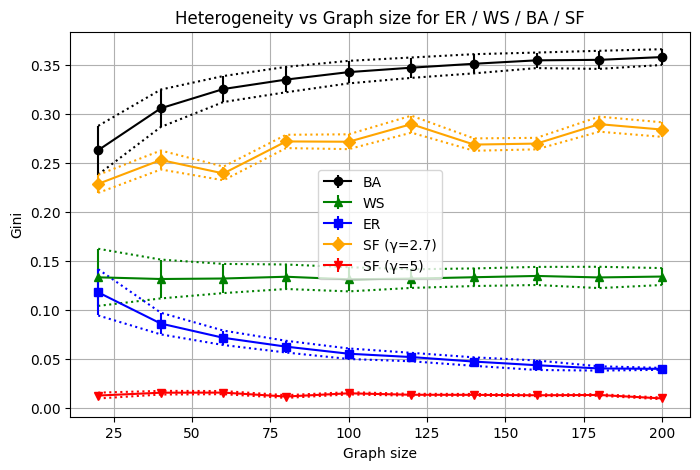

In [28]:
results = compute_gini_(runs=100)
plot_gini_results(results)